## 1. SIMMAN2020, MLP，归一化， 多轨迹输入，只留一个 zz_-10 作为测试


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/hanyuchen/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/hanyuchen/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/hanyuchen/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/hanyuchen/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start(

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/hanyuchen/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/hanyuchen/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/hanyuchen/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/hanyuchen/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start(

AttributeError: _ARRAY_API not found

[I 2025-03-05 18:39:40,911] A new study created in memory with name: no-name-685e59a8-0608-4d2d-81d0-ac82c1faa05c
/var/folders/th/gjrfgb2s5y595fsp9n6thlkm0000gn/T/ipykernel_26087/558839815.py:70: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
[I 2025-03-05 18:39:45,672] Trial 0 finished with value: 1.0108039379119873 and parameters: {'n1': 106, 'n2': 177, 'n3': 230, 'lr': 0.09281522574202983, 'batch_size': 16, 'activation_fn': 'relu', 'optimizer': 'Adam'}. Best is trial 0 with value: 1.0108039379119873.
/var/folders/th/gjrfgb2s5y595fsp9n6thlkm0000gn/T/ipykernel_26087/558839815.py:70: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inste

[I 2025-03-05 18:40:37,856] Trial 28 finished with value: 0.0016002700431272388 and parameters: {'n1': 51, 'n2': 200, 'n3': 194, 'lr': 0.003400517271990913, 'batch_size': 32, 'activation_fn': 'tanh', 'optimizer': 'Adam'}. Best is trial 5 with value: 0.00011161149450344965.
[I 2025-03-05 18:40:41,372] Trial 29 finished with value: 0.0003737176884897053 and parameters: {'n1': 106, 'n2': 37, 'n3': 238, 'lr': 0.0010330301990630383, 'batch_size': 16, 'activation_fn': 'relu', 'optimizer': 'Adam'}. Best is trial 5 with value: 0.00011161149450344965.


Best Parameters: {'n1': 80, 'n2': 232, 'n3': 191, 'lr': 0.002892386852403883, 'batch_size': 32, 'activation_fn': 'relu', 'optimizer': 'Adam'}
Epoch [50/300], Loss: 0.00106844
Epoch [100/300], Loss: 0.00011161
Epoch [150/300], Loss: 0.00026975
Epoch [200/300], Loss: 0.00005733
Epoch [250/300], Loss: 0.00010645
Epoch [300/300], Loss: 0.00002264
训练完成，下面生成图样：


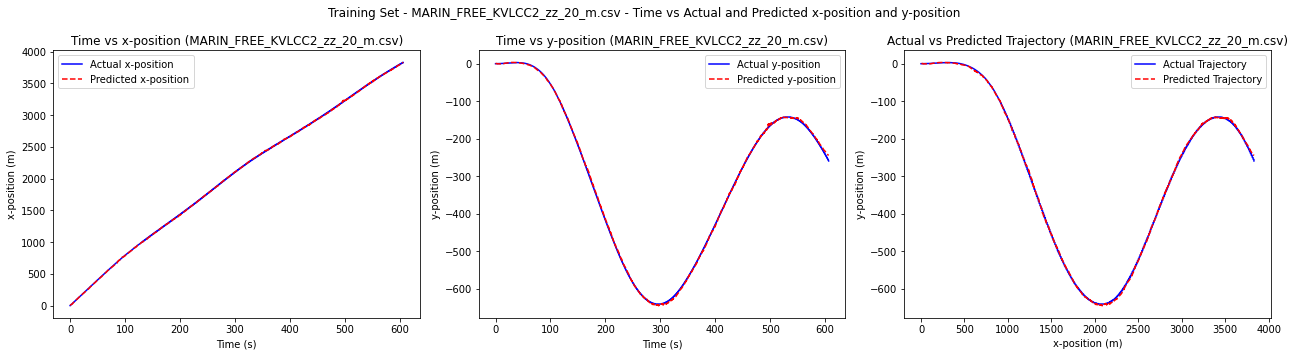

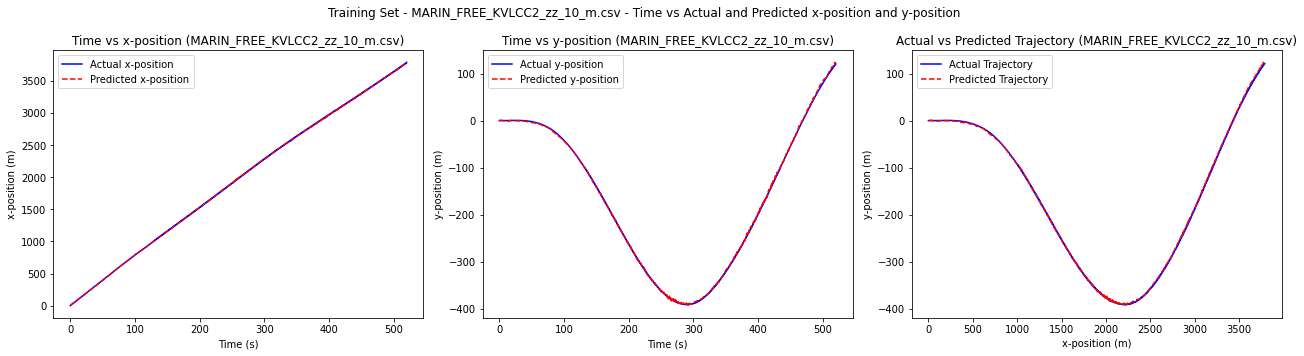

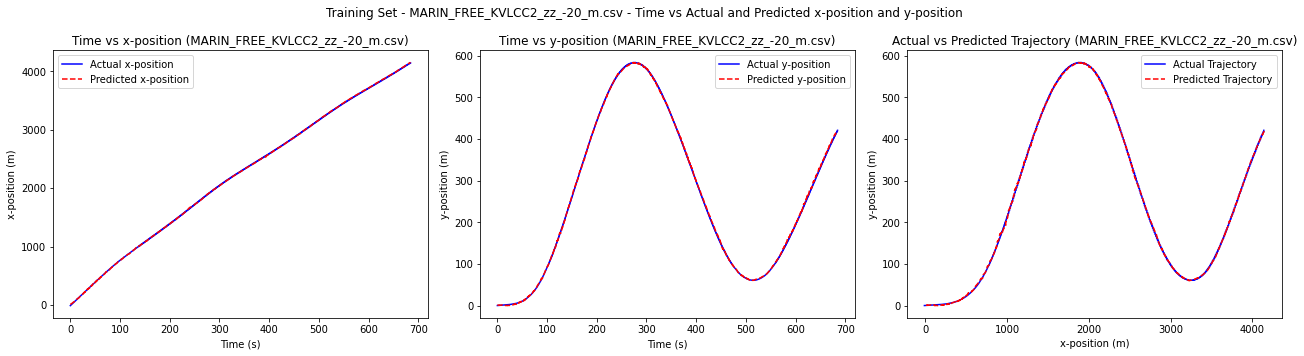

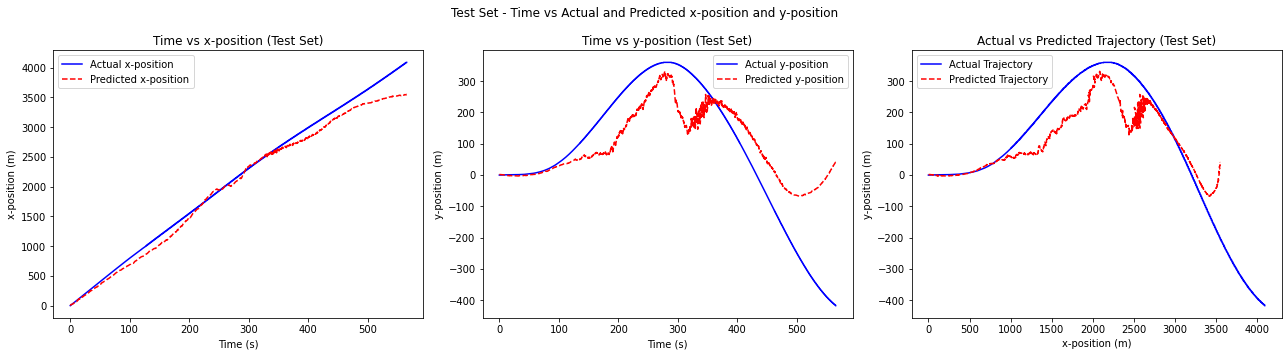

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import optuna
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# 读取SIMMAN2020文件夹下的所有CSV文件（排除MARIN_FREE_KVLCC2_zz_-10_m.csv作为测试集）
folder_path = 'SIMMAN2020_fixed'
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv') and f != 'MARIN_FREE_KVLCC2_zz_-10_m.csv']

inputs_train, targets_train = [], []
for file in file_list:
    data = pd.read_csv(os.path.join(folder_path, file))
    inputs = data[['time(s)', 'heel angle(deg)', 'heading angle(deg)', 'u(m/s)', 'v_m(m/s)', 
                   'roll(deg/s)', 'yaw(deg/s)', 'rudder angle(deg)', 'nps(RPM)']].values
    targets = data[['x-position(m)', 'y-position(m)']].values
    inputs_train.append(inputs)
    targets_train.append(targets)

# 合并数据
inputs_train = np.vstack(inputs_train)
targets_train = np.vstack(targets_train)

# 读取测试集
test_data = pd.read_csv(os.path.join(folder_path, 'MARIN_FREE_KVLCC2_zz_-10_m.csv'))
inputs_test = test_data[['time(s)', 'heel angle(deg)', 'heading angle(deg)', 'u(m/s)', 'v_m(m/s)', 
                         'roll(deg/s)', 'yaw(deg/s)', 'rudder angle(deg)', 'nps(RPM)']].values
targets_test = test_data[['x-position(m)', 'y-position(m)']].values

# 标准化
input_scaler, target_scaler = StandardScaler(), StandardScaler()
inputs_train = input_scaler.fit_transform(inputs_train)
inputs_test = input_scaler.transform(inputs_test)
targets_train = target_scaler.fit_transform(targets_train)
targets_test = target_scaler.transform(targets_test)

# 转换为 PyTorch 张量
X_train, y_train = torch.tensor(inputs_train, dtype=torch.float32), torch.tensor(targets_train, dtype=torch.float32)
X_test, y_test = torch.tensor(inputs_test, dtype=torch.float32), torch.tensor(targets_test, dtype=torch.float32)

# 创建 DataLoader
def get_dataloader(batch_size):
    train_dataset = TensorDataset(X_train, y_train)
    return DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 定义 CNN 网络
class CNN(nn.Module):
    def __init__(self, n1, n2, n3, activation_fn):
        super(CNN, self).__init__()
        self.fc1 = nn.Linear(9, n1)
        self.fc2 = nn.Linear(n1, n2)
        self.fc3 = nn.Linear(n2, n3)
        self.fc4 = nn.Linear(n3, 2)
        self.activation = {'relu': nn.ReLU(), 'sigmoid': nn.Sigmoid(), 'tanh': nn.Tanh()}[activation_fn]

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        return self.fc4(x)

# Optuna 目标函数
def objective(trial):
    n1, n2, n3 = trial.suggest_int('n1', 32, 256), trial.suggest_int('n2', 32, 256), trial.suggest_int('n3', 32, 256)
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])
    activation_fn = trial.suggest_categorical('activation_fn', ['relu', 'sigmoid', 'tanh'])
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'SGD'])

    model = CNN(n1, n2, n3, activation_fn)
    criterion = nn.MSELoss()
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr, weight_decay=1e-5)
    train_loader = get_dataloader(batch_size)

    for epoch in range(10):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            loss = criterion(model(X_batch), y_batch)
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        y_train_pred = model(X_train)
        train_loss = criterion(y_train_pred, y_train).item()

    return train_loss

# Optuna 运行超参数优化
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)
best_params = study.best_params
print("Best Parameters:", best_params)

# 用最佳参数训练最终模型
best_model = CNN(best_params['n1'], best_params['n2'], best_params['n3'], best_params['activation_fn'])
best_optimizer = getattr(optim, best_params['optimizer'])(best_model.parameters(), lr=best_params['lr'], weight_decay=1e-5)
criterion = nn.MSELoss()
train_loader = get_dataloader(best_params['batch_size'])

epochs = 300
for epoch in range(epochs):
    best_model.train()
    for X_batch, y_batch in train_loader:
        best_optimizer.zero_grad()
        loss = criterion(best_model(X_batch), y_batch)
        loss.backward()
        best_optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.8f}')

# 预测
best_model.eval()
with torch.no_grad():
    y_train_pred = best_model(X_train).numpy()
    y_test_pred = best_model(X_test).numpy()

# 反归一化
y_train_pred = target_scaler.inverse_transform(y_train_pred)
y_test_pred = target_scaler.inverse_transform(y_test_pred)
targets_train = target_scaler.inverse_transform(targets_train)
targets_test = target_scaler.inverse_transform(targets_test)

print("训练完成，下面生成图样：")

# 获取时间数据
time_train_list = [pd.read_csv(os.path.join(folder_path, file))['time(s)'].values for file in file_list]
time_test = test_data['time(s)'].values

# 分别绘制每个文件的训练集时间-位置曲线
for i, file in enumerate(file_list):
    # 获取每个文件的数据
    data = pd.read_csv(os.path.join(folder_path, file))
    targets = data[['x-position(m)', 'y-position(m)']].values

    # 索引范围，用于从合并数据中提取出当前文件对应的预测值
    start_idx = sum(len(pd.read_csv(os.path.join(folder_path, f))) for f in file_list[:i])
    end_idx = start_idx + len(targets)
    
    # 获取当前文件的时间数据和预测结果
    time_train = time_train_list[i]
    y_train_pred_current = y_train_pred[start_idx:end_idx]

    # 绘制当前文件的时间-位置曲线
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Training Set - {file} - Time vs Actual and Predicted x-position and y-position')

    # 绘制实际的 x-position 随时间变化
    axs[0].plot(time_train, targets[:, 0], 'b-', label='Actual x-position')
    axs[0].plot(time_train, y_train_pred_current[:, 0], 'r--', label='Predicted x-position')
    axs[0].set_title(f'Time vs x-position ({file})')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('x-position (m)')
    axs[0].legend()

    # 绘制实际的 y-position 随时间变化
    axs[1].plot(time_train, targets[:, 1], 'b-', label='Actual y-position')
    axs[1].plot(time_train, y_train_pred_current[:, 1], 'r--', label='Predicted y-position')
    axs[1].set_title(f'Time vs y-position ({file})')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('y-position (m)')
    axs[1].legend()

    # 绘制实际值与预测值的比较
    axs[2].plot(targets[:, 0], targets[:, 1], 'b-', label='Actual Trajectory')
    axs[2].plot(y_train_pred_current[:, 0], y_train_pred_current[:, 1], 'r--', label='Predicted Trajectory')
    axs[2].set_title(f'Actual vs Predicted Trajectory ({file})')
    axs[2].set_xlabel('x-position (m)')
    axs[2].set_ylabel('y-position (m)')
    axs[2].legend()

    plt.tight_layout()
    plt.show()

# 绘制测试集时间-位置曲线
fig_test_time, axs_test_time = plt.subplots(1, 3, figsize=(18, 5))
fig_test_time.suptitle('Test Set - Time vs Actual and Predicted x-position and y-position')

# 绘制实际的 x-position 随时间变化
axs_test_time[0].plot(time_test, targets_test[:, 0], 'b-', label='Actual x-position')
axs_test_time[0].plot(time_test, y_test_pred[:, 0], 'r--', label='Predicted x-position')
axs_test_time[0].set_title('Time vs x-position (Test Set)')
axs_test_time[0].set_xlabel('Time (s)')
axs_test_time[0].set_ylabel('x-position (m)')
axs_test_time[0].legend()

# 绘制实际的 y-position 随时间变化
axs_test_time[1].plot(time_test, targets_test[:, 1], 'b-', label='Actual y-position')
axs_test_time[1].plot(time_test, y_test_pred[:, 1], 'r--', label='Predicted y-position')
axs_test_time[1].set_title('Time vs y-position (Test Set)')
axs_test_time[1].set_xlabel('Time (s)')
axs_test_time[1].set_ylabel('y-position (m)')
axs_test_time[1].legend()

# 绘制实际值与预测值的比较
axs_test_time[2].plot(targets_test[:, 0], targets_test[:, 1], 'b-', label='Actual Trajectory')
axs_test_time[2].plot(y_test_pred[:, 0], y_test_pred[:, 1], 'r--', label='Predicted Trajectory')
axs_test_time[2].set_title('Actual vs Predicted Trajectory (Test Set)')
axs_test_time[2].set_xlabel('x-position (m)')
axs_test_time[2].set_ylabel('y-position (m)')
axs_test_time[2].legend()

plt.tight_layout()
plt.show()

## 2. SIMMAN2020，Res+attention 机制，归一化， 多轨迹输入做测试

Epoch [100/1000], Loss: 0.00061099
Epoch [200/1000], Loss: 0.00013251
Epoch [300/1000], Loss: 0.00002777
Epoch [400/1000], Loss: 0.00003058
Epoch [500/1000], Loss: 0.00002163
Epoch [600/1000], Loss: 0.00001953
Epoch [700/1000], Loss: 0.00001518
Epoch [800/1000], Loss: 0.00001499
Epoch [900/1000], Loss: 0.00002030
Epoch [1000/1000], Loss: 0.00001181
训练完成，下面生成图样：


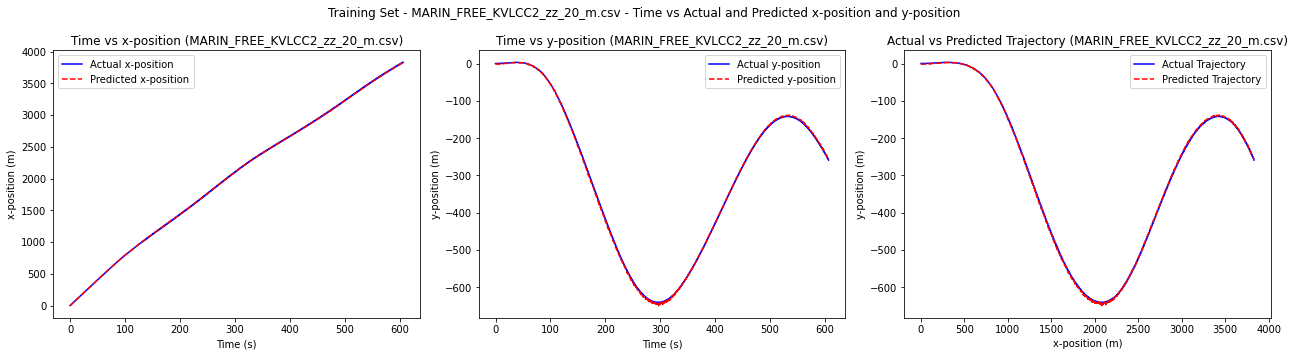

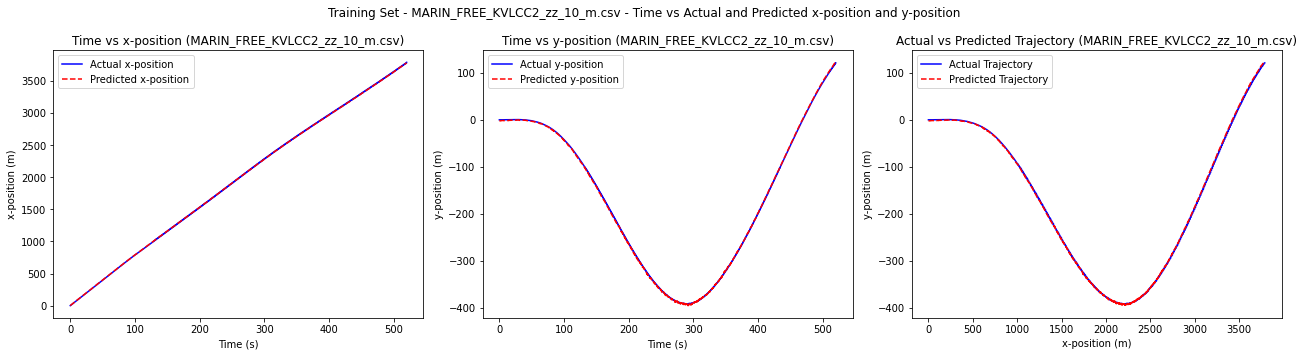

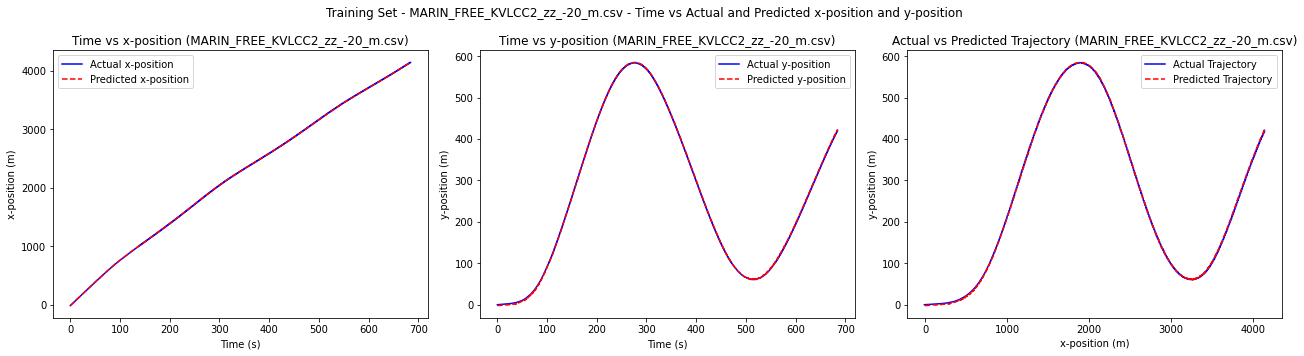

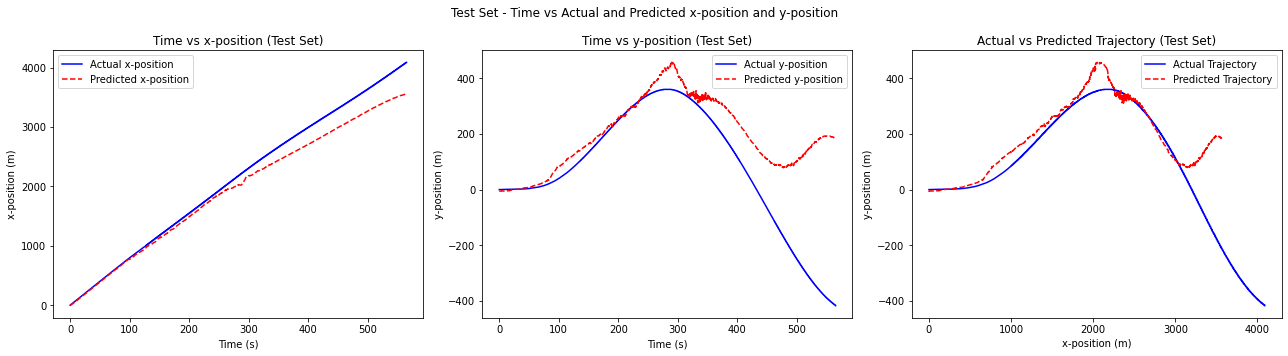

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# 读取SIMMAN2020文件夹下的所有CSV文件（排除MARIN_FREE_KVLCC2_zz_-10_m.csv作为测试集）
folder_path = 'SIMMAN2020_fixed'
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv') and f != 'MARIN_FREE_KVLCC2_zz_-10_m.csv']

# 初始化输入和目标数据
inputs_train = []
targets_train = []

for file in file_list:
    data = pd.read_csv(os.path.join(folder_path, file))
    inputs = data[['time(s)', 'heel angle(deg)', 'heading angle(deg)', 'u(m/s)', 'v_m(m/s)', 
                   'roll(deg/s)', 'yaw(deg/s)', 'rudder angle(deg)', 'nps(RPM)']].values
    targets = data[['x-position(m)', 'y-position(m)']].values
    
    inputs_train.append(inputs)
    targets_train.append(targets)

# 合并所有数据
inputs_train = np.vstack(inputs_train)
targets_train = np.vstack(targets_train)

# 读取测试集数据（MARIN_FREE_KVLCC2_zz_-10_m）
test_data = pd.read_csv(os.path.join(folder_path, 'MARIN_FREE_KVLCC2_zz_-10_m.csv'))
inputs_test = test_data[['time(s)', 'heel angle(deg)', 'heading angle(deg)', 'u(m/s)', 'v_m(m/s)', 
                         'roll(deg/s)', 'yaw(deg/s)', 'rudder angle(deg)', 'nps(RPM)']].values
targets_test = test_data[['x-position(m)', 'y-position(m)']].values

# 对输入进行标准化
input_scaler = StandardScaler()
inputs_train = input_scaler.fit_transform(inputs_train)
inputs_test = input_scaler.transform(inputs_test)  # 不能 fit_transform，否则测试集会使用自己的均值和方差

# 对目标（输出）进行标准化
target_scaler = StandardScaler()
targets_train = target_scaler.fit_transform(targets_train)
targets_test = target_scaler.transform(targets_test)  # 使用训练集的均值和标准差进行标准化

# 转换为 PyTorch 张量
X_train = torch.tensor(inputs_train, dtype=torch.float32)
y_train = torch.tensor(targets_train, dtype=torch.float32)
X_test = torch.tensor(inputs_test, dtype=torch.float32)
y_test = torch.tensor(targets_test, dtype=torch.float32)

# 创建 DataLoader，用于批量训练
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # 设定合适的批量大小

# 定义 ResidualAttentionNN 网络结构
class ResidualAttentionNN(nn.Module):
    def __init__(self, input_size=9):
        super(ResidualAttentionNN, self).__init__()
        
        # 共享特征提取层
        self.base = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.BatchNorm1d(512),
            nn.SiLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.SiLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.SiLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.SiLU(),
            nn.Linear(64, 32),
            nn.SiLU()
        )

        # 残差路径
        self.residual_layer = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.SiLU(),
            nn.Linear(64, 32),
            nn.SiLU()
        )

        # 注意力机制
        self.attention = nn.MultiheadAttention(embed_dim=32, num_heads=4, batch_first=True)

        # 最终输出层
        self.output_layer = nn.Linear(32, 2)  # 输出 x-position 和 y-position

    def forward(self, x):
        base_out = self.base(x)
        residual = self.residual_layer(x)
        combined = base_out + residual  # 残差连接

        # 自注意力机制
        attn_out, _ = self.attention(combined.unsqueeze(1), combined.unsqueeze(1), combined.unsqueeze(1))
        attn_out = attn_out.squeeze(1)
        combined = combined + attn_out  # 再次残差连接

        return self.output_layer(combined)


# 超参数定义
model = ResidualAttentionNN(input_size=9)  # 输入维度为9
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=5e-5)
criterion = nn.SmoothL1Loss(beta=0.5)

epochs = 1000
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs_batch, targets_batch) in enumerate(train_loader):
        optimizer.zero_grad()
        
        # 向前传播
        outputs = model(inputs_batch)
        loss = criterion(outputs, targets_batch)
        
        # 向后传播和优化
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    # 每50个epoch输出一次损失
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss / len(train_loader):.8f}')

# 预测并绘图
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train).numpy()
    y_test_pred = model(X_test).numpy()
    
# 反归一化预测结果
y_train_pred = target_scaler.inverse_transform(y_train_pred)
y_test_pred = target_scaler.inverse_transform(y_test_pred)

# 反归一化真实目标值（其实不必要，因为原始数据已经是非归一化的）
targets_train = target_scaler.inverse_transform(targets_train)
targets_test = target_scaler.inverse_transform(targets_test)

print("训练完成，下面生成图样：")

# 获取时间数据
time_train_list = [pd.read_csv(os.path.join(folder_path, file))['time(s)'].values for file in file_list]
time_test = test_data['time(s)'].values

# 分别绘制每个文件的训练集时间-位置曲线
for i, file in enumerate(file_list):
    # 获取每个文件的数据
    data = pd.read_csv(os.path.join(folder_path, file))
    targets = data[['x-position(m)', 'y-position(m)']].values

    # 索引范围，用于从合并数据中提取出当前文件对应的预测值
    start_idx = sum(len(pd.read_csv(os.path.join(folder_path, f))) for f in file_list[:i])
    end_idx = start_idx + len(targets)
    
    # 获取当前文件的时间数据和预测结果
    time_train = time_train_list[i]
    y_train_pred_current = y_train_pred[start_idx:end_idx]

    # 绘制当前文件的时间-位置曲线
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Training Set - {file} - Time vs Actual and Predicted x-position and y-position')

    # 绘制实际的 x-position 随时间变化
    axs[0].plot(time_train, targets[:, 0], 'b-', label='Actual x-position')
    axs[0].plot(time_train, y_train_pred_current[:, 0], 'r--', label='Predicted x-position')
    axs[0].set_title(f'Time vs x-position ({file})')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('x-position (m)')
    axs[0].legend()

    # 绘制实际的 y-position 随时间变化
    axs[1].plot(time_train, targets[:, 1], 'b-', label='Actual y-position')
    axs[1].plot(time_train, y_train_pred_current[:, 1], 'r--', label='Predicted y-position')
    axs[1].set_title(f'Time vs y-position ({file})')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('y-position (m)')
    axs[1].legend()

    # 绘制实际值与预测值的比较
    axs[2].plot(targets[:, 0], targets[:, 1], 'b-', label='Actual Trajectory')
    axs[2].plot(y_train_pred_current[:, 0], y_train_pred_current[:, 1], 'r--', label='Predicted Trajectory')
    axs[2].set_title(f'Actual vs Predicted Trajectory ({file})')
    axs[2].set_xlabel('x-position (m)')
    axs[2].set_ylabel('y-position (m)')
    axs[2].legend()

    plt.tight_layout()
    plt.show()

# 绘制测试集时间-位置曲线
fig_test_time, axs_test_time = plt.subplots(1, 3, figsize=(18, 5))
fig_test_time.suptitle('Test Set - Time vs Actual and Predicted x-position and y-position')

# 绘制实际的 x-position 随时间变化
axs_test_time[0].plot(time_test, targets_test[:, 0], 'b-', label='Actual x-position')
axs_test_time[0].plot(time_test, y_test_pred[:, 0], 'r--', label='Predicted x-position')
axs_test_time[0].set_title('Time vs x-position (Test Set)')
axs_test_time[0].set_xlabel('Time (s)')
axs_test_time[0].set_ylabel('x-position (m)')
axs_test_time[0].legend()

# 绘制实际的 y-position 随时间变化
axs_test_time[1].plot(time_test, targets_test[:, 1], 'b-', label='Actual y-position')
axs_test_time[1].plot(time_test, y_test_pred[:, 1], 'r--', label='Predicted y-position')
axs_test_time[1].set_title('Time vs y-position (Test Set)')
axs_test_time[1].set_xlabel('Time (s)')
axs_test_time[1].set_ylabel('y-position (m)')
axs_test_time[1].legend()

# 绘制实际值与预测值的比较
axs_test_time[2].plot(targets_test[:, 0], targets_test[:, 1], 'b-', label='Actual Trajectory')
axs_test_time[2].plot(y_test_pred[:, 0], y_test_pred[:, 1], 'r--', label='Predicted Trajectory')
axs_test_time[2].set_title('Actual vs Predicted Trajectory (Test Set)')
axs_test_time[2].set_xlabel('x-position (m)')
axs_test_time[2].set_ylabel('y-position (m)')
axs_test_time[2].legend()

plt.tight_layout()
plt.show()


## Res+attention 对x_dot, y_dot预测

Epoch [100/1000], Loss: 0.27473627
Epoch [200/1000], Loss: 0.27507140
Epoch [300/1000], Loss: 0.27349319
Epoch [400/1000], Loss: 0.27330290
Epoch [500/1000], Loss: 0.27366351
Epoch [600/1000], Loss: 0.27327229
Epoch [700/1000], Loss: 0.27344157
Epoch [800/1000], Loss: 0.27340696
Epoch [900/1000], Loss: 0.27398388
Epoch [1000/1000], Loss: 0.27323619
训练完成，下面生成图样：


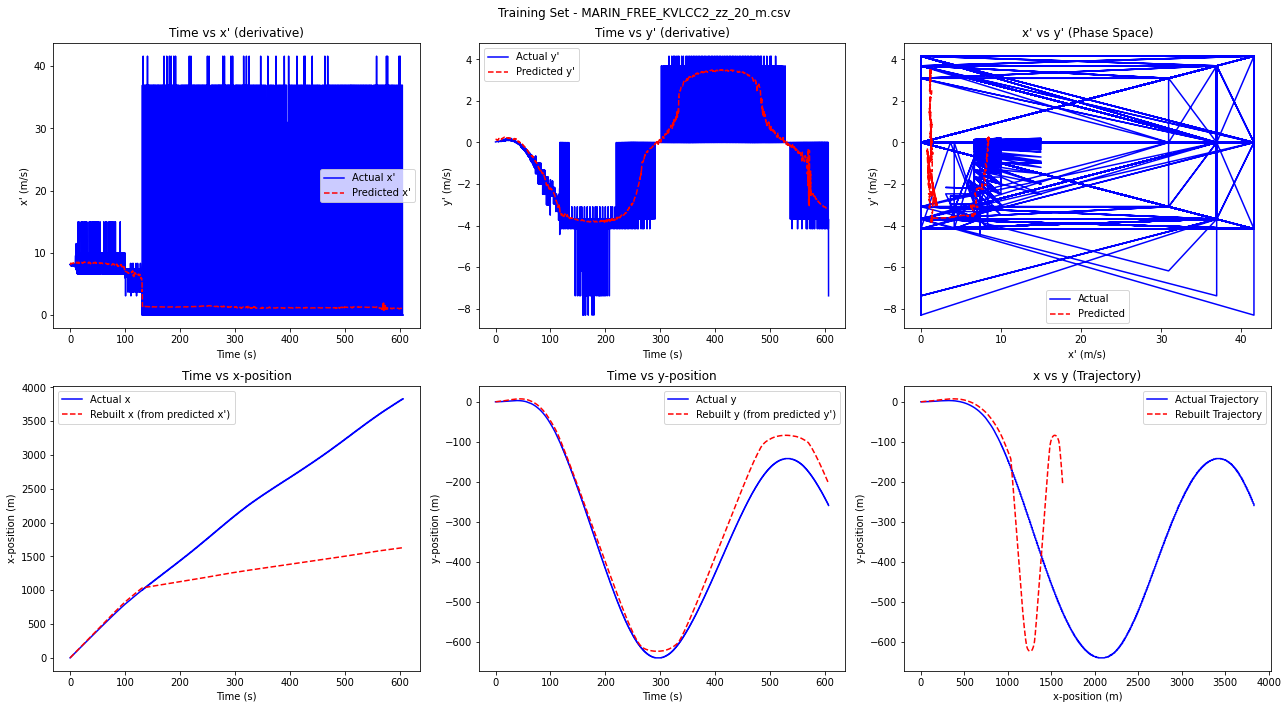

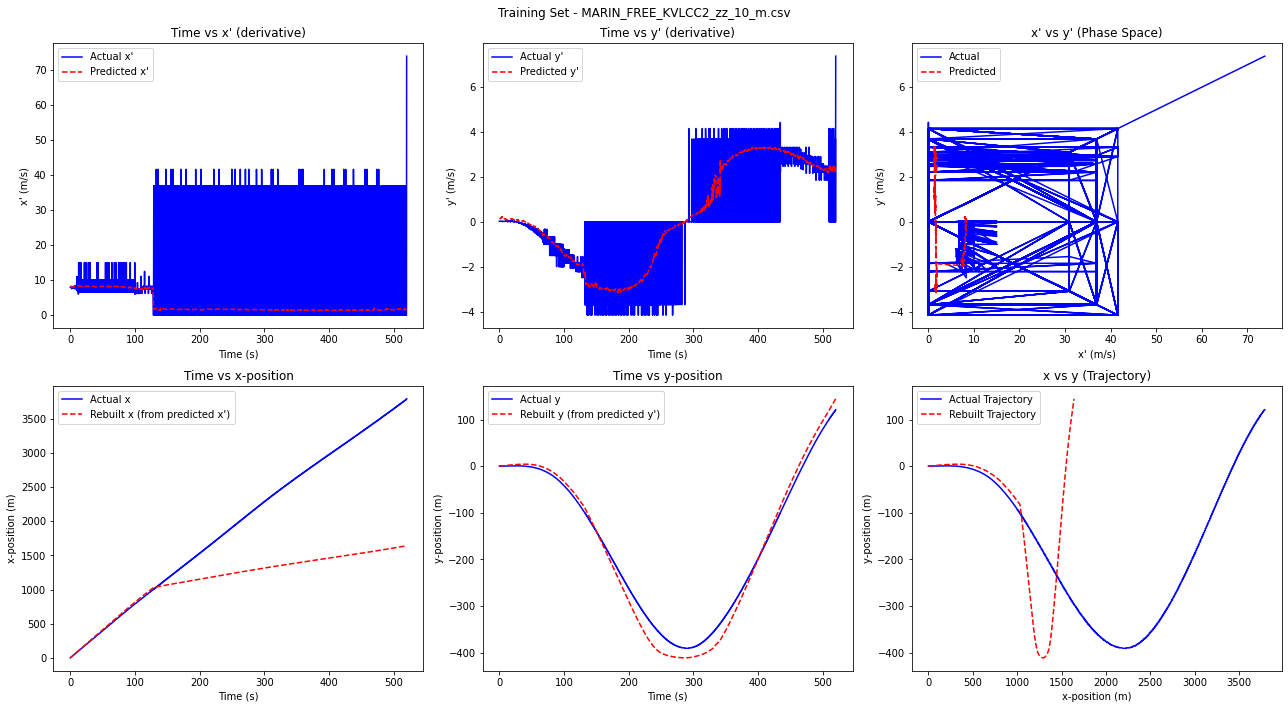

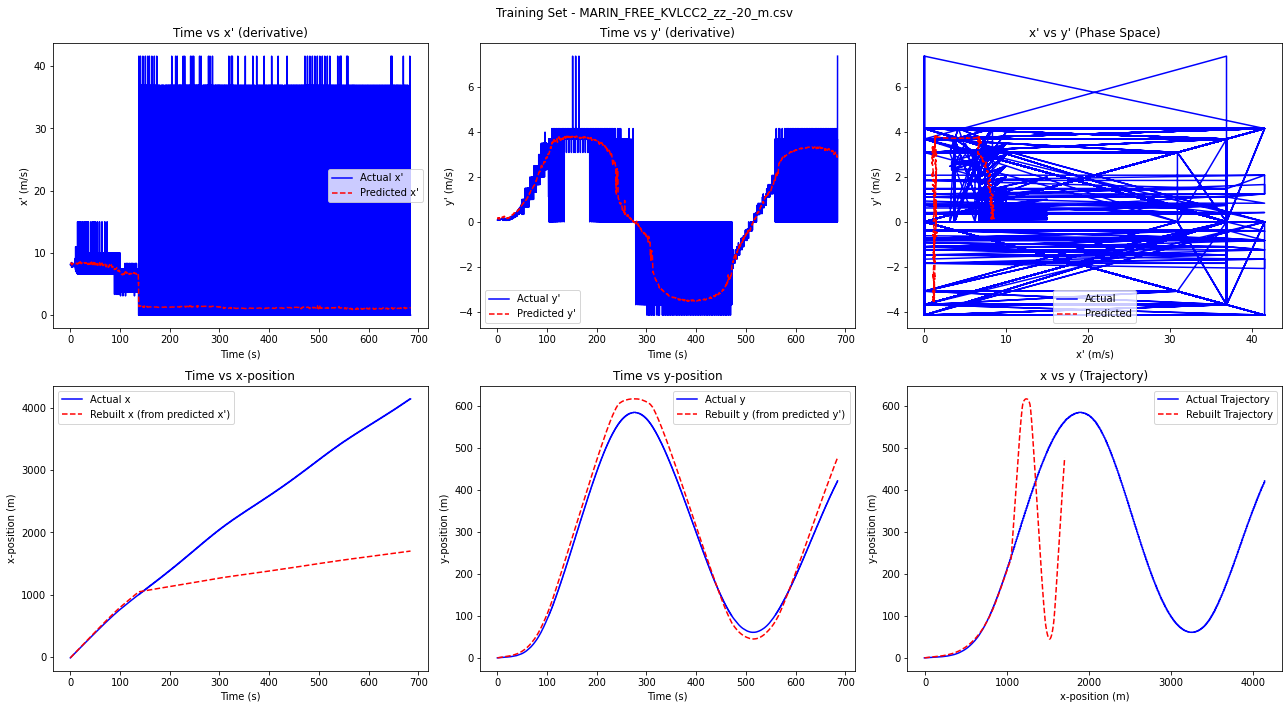

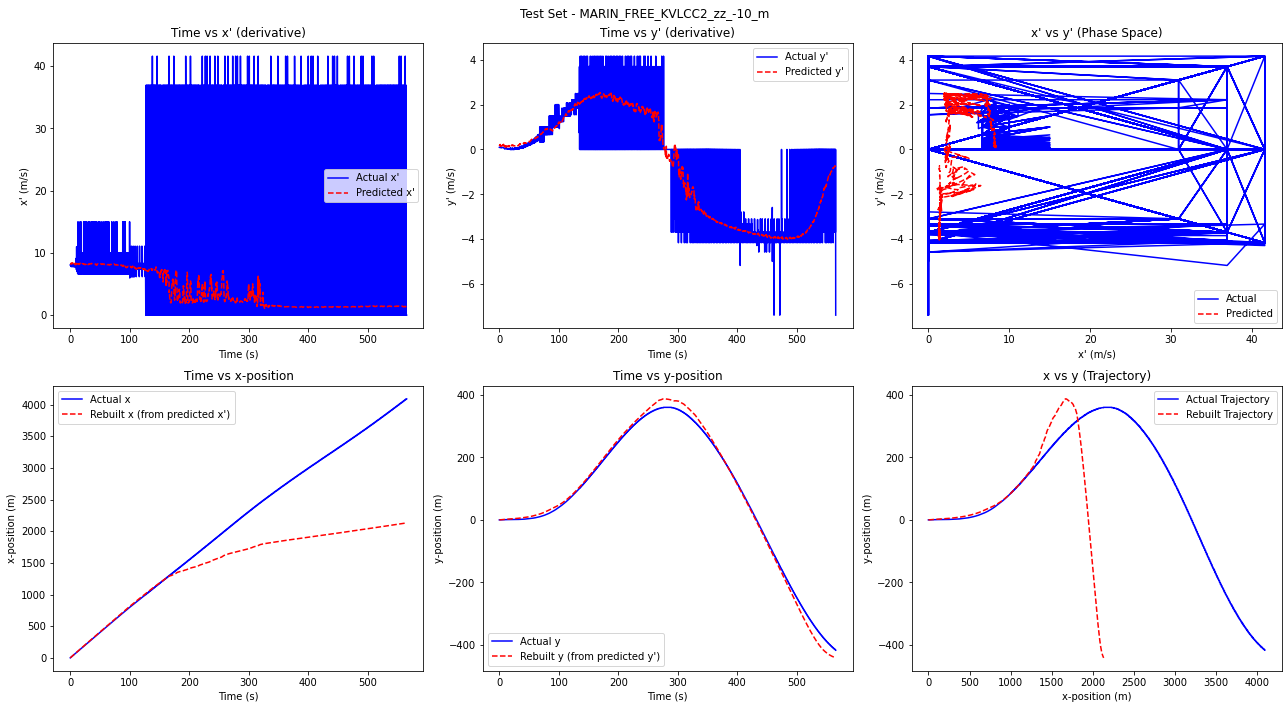

测试集 x' RMSE: 13.5446 m/s
测试集 y' RMSE: 1.3321 m/s
测试集 x-position RMSE (通过积分重建): 917.0073 m
测试集 y-position RMSE (通过积分重建): 16.2685 m


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# 读取SIMMAN2020文件夹下的所有CSV文件（排除MARIN_FREE_KVLCC2_zz_-10_m.csv作为测试集）
folder_path = 'SIMMAN2020_fixed'
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv') and f != 'MARIN_FREE_KVLCC2_zz_-10_m.csv']

# 初始化输入和目标数据
inputs_train = []
targets_train = []

# 计算位置的导数作为目标
for file in file_list:
    data = pd.read_csv(os.path.join(folder_path, file))
    inputs = data[['time(s)', 'heel angle(deg)', 'heading angle(deg)', 'u(m/s)', 'v_m(m/s)', 
                   'roll(deg/s)', 'yaw(deg/s)', 'rudder angle(deg)', 'nps(RPM)']].values
    
    # 计算 x-position 和 y-position 的导数 (x', y')
    x_position = data['x-position(m)'].values
    y_position = data['y-position(m)'].values
    time = data['time(s)'].values
    
    # 使用差分计算导数
    x_derivative = np.zeros_like(x_position)
    y_derivative = np.zeros_like(y_position)
    
    # 对第一个点使用前向差分，对最后一个点使用后向差分，对其他点使用中心差分
    # 前向差分（第一个点）
    x_derivative[0] = (x_position[1] - x_position[0]) / (time[1] - time[0])
    y_derivative[0] = (y_position[1] - y_position[0]) / (time[1] - time[0])
    
    # 中心差分（中间点）
    for i in range(1, len(time) - 1):
        x_derivative[i] = (x_position[i+1] - x_position[i-1]) / (time[i+1] - time[i-1])
        y_derivative[i] = (y_position[i+1] - y_position[i-1]) / (time[i+1] - time[i-1])
    
    # 后向差分（最后一个点）
    x_derivative[-1] = (x_position[-1] - x_position[-2]) / (time[-1] - time[-2])
    y_derivative[-1] = (y_position[-1] - y_position[-2]) / (time[-1] - time[-2])
    
    # 将导数作为目标
    derivatives = np.column_stack((x_derivative, y_derivative))
    
    inputs_train.append(inputs)
    targets_train.append(derivatives)

# 合并所有数据
inputs_train = np.vstack(inputs_train)
targets_train = np.vstack(targets_train)

# 读取测试集数据（MARIN_FREE_KVLCC2_zz_-10_m）
test_data = pd.read_csv(os.path.join(folder_path, 'MARIN_FREE_KVLCC2_zz_-10_m.csv'))
inputs_test = test_data[['time(s)', 'heel angle(deg)', 'heading angle(deg)', 'u(m/s)', 'v_m(m/s)', 
                         'roll(deg/s)', 'yaw(deg/s)', 'rudder angle(deg)', 'nps(RPM)']].values

# 计算测试集的导数
x_position_test = test_data['x-position(m)'].values
y_position_test = test_data['y-position(m)'].values
time_test = test_data['time(s)'].values

x_derivative_test = np.zeros_like(x_position_test)
y_derivative_test = np.zeros_like(y_position_test)

# 前向差分（第一个点）
x_derivative_test[0] = (x_position_test[1] - x_position_test[0]) / (time_test[1] - time_test[0])
y_derivative_test[0] = (y_position_test[1] - y_position_test[0]) / (time_test[1] - time_test[0])

# 中心差分（中间点）
for i in range(1, len(time_test) - 1):
    x_derivative_test[i] = (x_position_test[i+1] - x_position_test[i-1]) / (time_test[i+1] - time_test[i-1])
    y_derivative_test[i] = (y_position_test[i+1] - y_position_test[i-1]) / (time_test[i+1] - time_test[i-1])

# 后向差分（最后一个点）
x_derivative_test[-1] = (x_position_test[-1] - x_position_test[-2]) / (time_test[-1] - time_test[-2])
y_derivative_test[-1] = (y_position_test[-1] - y_position_test[-2]) / (time_test[-1] - time_test[-2])

targets_test = np.column_stack((x_derivative_test, y_derivative_test))

# 对输入进行标准化
input_scaler = StandardScaler()
inputs_train = input_scaler.fit_transform(inputs_train)
inputs_test = input_scaler.transform(inputs_test)  # 使用训练集的均值和标准差

# 对目标（输出）进行标准化
target_scaler = StandardScaler()
targets_train = target_scaler.fit_transform(targets_train)
targets_test = target_scaler.transform(targets_test)  # 使用训练集的均值和标准差

# 转换为 PyTorch 张量
X_train = torch.tensor(inputs_train, dtype=torch.float32)
y_train = torch.tensor(targets_train, dtype=torch.float32)
X_test = torch.tensor(inputs_test, dtype=torch.float32)
y_test = torch.tensor(targets_test, dtype=torch.float32)

# 创建 DataLoader，用于批量训练
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# 定义 ResidualAttentionNN 网络结构
class ResidualAttentionNN(nn.Module):
    def __init__(self, input_size=9):
        super(ResidualAttentionNN, self).__init__()
        
        # 共享特征提取层
        self.base = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.BatchNorm1d(512),
            nn.SiLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.SiLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.SiLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.SiLU(),
            nn.Linear(64, 32),
            nn.SiLU()
        )

        # 残差路径
        self.residual_layer = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.SiLU(),
            nn.Linear(64, 32),
            nn.SiLU()
        )

        # 注意力机制
        self.attention = nn.MultiheadAttention(embed_dim=32, num_heads=4, batch_first=True)

        # 最终输出层
        self.output_layer = nn.Linear(32, 2)  # 输出 x' 和 y'（位置对时间的导数）

    def forward(self, x):
        base_out = self.base(x)
        residual = self.residual_layer(x)
        combined = base_out + residual  # 残差连接

        # 自注意力机制
        attn_out, _ = self.attention(combined.unsqueeze(1), combined.unsqueeze(1), combined.unsqueeze(1))
        attn_out = attn_out.squeeze(1)
        combined = combined + attn_out  # 再次残差连接

        return self.output_layer(combined)

# 超参数定义
model = ResidualAttentionNN(input_size=9)  # 输入维度为9
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=5e-5)
criterion = nn.SmoothL1Loss(beta=0.5)

epochs = 1000
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs_batch, targets_batch) in enumerate(train_loader):
        optimizer.zero_grad()
        
        # 向前传播
        outputs = model(inputs_batch)
        loss = criterion(outputs, targets_batch)
        
        # 向后传播和优化
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    # 每100个epoch输出一次损失
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss / len(train_loader):.8f}')

# 预测并绘图
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train).numpy()
    y_test_pred = model(X_test).numpy()
    
# 反归一化预测结果
y_train_pred = target_scaler.inverse_transform(y_train_pred)
y_test_pred = target_scaler.inverse_transform(y_test_pred)

# 反归一化真实目标值
targets_train_orig = target_scaler.inverse_transform(targets_train)
targets_test_orig = target_scaler.inverse_transform(targets_test)

print("训练完成，下面生成图样：")

# 获取时间数据和准备数据结构来存储每个文件的原始位置和导数
time_train_list = []
x_position_list = []
y_position_list = []
x_derivative_list = []
y_derivative_list = []
x_derivative_pred_list = []
y_derivative_pred_list = []
file_indices = []

current_idx = 0
for file in file_list:
    data = pd.read_csv(os.path.join(folder_path, file))
    time_data = data['time(s)'].values
    x_pos = data['x-position(m)'].values
    y_pos = data['y-position(m)'].values
    
    file_len = len(data)
    time_train_list.append(time_data)
    x_position_list.append(x_pos)
    y_position_list.append(y_pos)
    
    # 提取该文件对应的预测导数
    start_idx = current_idx
    end_idx = start_idx + file_len
    file_indices.append((start_idx, end_idx))
    
    x_deriv = targets_train_orig[start_idx:end_idx, 0]
    y_deriv = targets_train_orig[start_idx:end_idx, 1]
    x_deriv_pred = y_train_pred[start_idx:end_idx, 0]
    y_deriv_pred = y_train_pred[start_idx:end_idx, 1]
    
    x_derivative_list.append(x_deriv)
    y_derivative_list.append(y_deriv)
    x_derivative_pred_list.append(x_deriv_pred)
    y_derivative_pred_list.append(y_deriv_pred)
    
    current_idx += file_len

# 分别绘制每个文件的训练集时间-导数曲线和时间-位置积分曲线
for i, file in enumerate(file_list):
    time_train = time_train_list[i]
    x_position = x_position_list[i]
    y_position = y_position_list[i]
    x_derivative = x_derivative_list[i]
    y_derivative = y_derivative_list[i]
    x_derivative_pred = x_derivative_pred_list[i]
    y_derivative_pred = y_derivative_pred_list[i]
    
    # 从预测的导数通过欧拉积分重建位置
    x_rebuilt = np.zeros_like(x_position)
    y_rebuilt = np.zeros_like(y_position)
    
    # 第一个点使用真实值
    x_rebuilt[0] = x_position[0]
    y_rebuilt[0] = y_position[0]
    
    # 欧拉积分
    for j in range(1, len(time_train)):
        dt = time_train[j] - time_train[j-1]
        x_rebuilt[j] = x_rebuilt[j-1] + x_derivative_pred[j-1] * dt
        y_rebuilt[j] = y_rebuilt[j-1] + y_derivative_pred[j-1] * dt
    
    # 创建两行图：第一行显示导数，第二行显示位置
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f'Training Set - {file}')
    
    # 第一行：导数
    axs[0, 0].plot(time_train, x_derivative, 'b-', label='Actual x\'')
    axs[0, 0].plot(time_train, x_derivative_pred, 'r--', label='Predicted x\'')
    axs[0, 0].set_title('Time vs x\' (derivative)')
    axs[0, 0].set_xlabel('Time (s)')
    axs[0, 0].set_ylabel('x\' (m/s)')
    axs[0, 0].legend()
    
    axs[0, 1].plot(time_train, y_derivative, 'b-', label='Actual y\'')
    axs[0, 1].plot(time_train, y_derivative_pred, 'r--', label='Predicted y\'')
    axs[0, 1].set_title('Time vs y\' (derivative)')
    axs[0, 1].set_xlabel('Time (s)')
    axs[0, 1].set_ylabel('y\' (m/s)')
    axs[0, 1].legend()
    
    # 第一行第三列：相位图 (x' vs y')
    axs[0, 2].plot(x_derivative, y_derivative, 'b-', label='Actual')
    axs[0, 2].plot(x_derivative_pred, y_derivative_pred, 'r--', label='Predicted')
    axs[0, 2].set_title('x\' vs y\' (Phase Space)')
    axs[0, 2].set_xlabel('x\' (m/s)')
    axs[0, 2].set_ylabel('y\' (m/s)')
    axs[0, 2].legend()
    
    # 第二行：位置和积分后的位置
    axs[1, 0].plot(time_train, x_position, 'b-', label='Actual x')
    axs[1, 0].plot(time_train, x_rebuilt, 'r--', label='Rebuilt x (from predicted x\')')
    axs[1, 0].set_title('Time vs x-position')
    axs[1, 0].set_xlabel('Time (s)')
    axs[1, 0].set_ylabel('x-position (m)')
    axs[1, 0].legend()
    
    axs[1, 1].plot(time_train, y_position, 'b-', label='Actual y')
    axs[1, 1].plot(time_train, y_rebuilt, 'r--', label='Rebuilt y (from predicted y\')')
    axs[1, 1].set_title('Time vs y-position')
    axs[1, 1].set_xlabel('Time (s)')
    axs[1, 1].set_ylabel('y-position (m)')
    axs[1, 1].legend()
    
    # 第二行第三列：轨迹图 (x vs y)
    axs[1, 2].plot(x_position, y_position, 'b-', label='Actual Trajectory')
    axs[1, 2].plot(x_rebuilt, y_rebuilt, 'r--', label='Rebuilt Trajectory')
    axs[1, 2].set_title('x vs y (Trajectory)')
    axs[1, 2].set_xlabel('x-position (m)')
    axs[1, 2].set_ylabel('y-position (m)')
    axs[1, 2].legend()
    
    plt.tight_layout()
    plt.show()

# 测试集处理：从预测的导数重建位置
# 从预测的导数通过欧拉积分重建位置
x_rebuilt_test = np.zeros_like(x_position_test)
y_rebuilt_test = np.zeros_like(y_position_test)

# 使用真实的初始位置
x_rebuilt_test[0] = x_position_test[0]
y_rebuilt_test[0] = y_position_test[0]

# 欧拉积分
for j in range(1, len(time_test)):
    dt = time_test[j] - time_test[j-1]
    x_rebuilt_test[j] = x_rebuilt_test[j-1] + y_test_pred[j-1, 0] * dt
    y_rebuilt_test[j] = y_rebuilt_test[j-1] + y_test_pred[j-1, 1] * dt

# 测试集图形：两行
fig_test, axs_test = plt.subplots(2, 3, figsize=(18, 10))
fig_test.suptitle('Test Set - MARIN_FREE_KVLCC2_zz_-10_m')

# 第一行：导数
axs_test[0, 0].plot(time_test, targets_test_orig[:, 0], 'b-', label='Actual x\'')
axs_test[0, 0].plot(time_test, y_test_pred[:, 0], 'r--', label='Predicted x\'')
axs_test[0, 0].set_title('Time vs x\' (derivative)')
axs_test[0, 0].set_xlabel('Time (s)')
axs_test[0, 0].set_ylabel('x\' (m/s)')
axs_test[0, 0].legend()

axs_test[0, 1].plot(time_test, targets_test_orig[:, 1], 'b-', label='Actual y\'')
axs_test[0, 1].plot(time_test, y_test_pred[:, 1], 'r--', label='Predicted y\'')
axs_test[0, 1].set_title('Time vs y\' (derivative)')
axs_test[0, 1].set_xlabel('Time (s)')
axs_test[0, 1].set_ylabel('y\' (m/s)')
axs_test[0, 1].legend()

# 第一行第三列：相位图 (x' vs y')
axs_test[0, 2].plot(targets_test_orig[:, 0], targets_test_orig[:, 1], 'b-', label='Actual')
axs_test[0, 2].plot(y_test_pred[:, 0], y_test_pred[:, 1], 'r--', label='Predicted')
axs_test[0, 2].set_title('x\' vs y\' (Phase Space)')
axs_test[0, 2].set_xlabel('x\' (m/s)')
axs_test[0, 2].set_ylabel('y\' (m/s)')
axs_test[0, 2].legend()

# 第二行：位置和积分后的位置
axs_test[1, 0].plot(time_test, x_position_test, 'b-', label='Actual x')
axs_test[1, 0].plot(time_test, x_rebuilt_test, 'r--', label='Rebuilt x (from predicted x\')')
axs_test[1, 0].set_title('Time vs x-position')
axs_test[1, 0].set_xlabel('Time (s)')
axs_test[1, 0].set_ylabel('x-position (m)')
axs_test[1, 0].legend()

axs_test[1, 1].plot(time_test, y_position_test, 'b-', label='Actual y')
axs_test[1, 1].plot(time_test, y_rebuilt_test, 'r--', label='Rebuilt y (from predicted y\')')
axs_test[1, 1].set_title('Time vs y-position')
axs_test[1, 1].set_xlabel('Time (s)')
axs_test[1, 1].set_ylabel('y-position (m)')
axs_test[1, 1].legend()

# 第二行第三列：轨迹图 (x vs y)
axs_test[1, 2].plot(x_position_test, y_position_test, 'b-', label='Actual Trajectory')
axs_test[1, 2].plot(x_rebuilt_test, y_rebuilt_test, 'r--', label='Rebuilt Trajectory')
axs_test[1, 2].set_title('x vs y (Trajectory)')
axs_test[1, 2].set_xlabel('x-position (m)')
axs_test[1, 2].set_ylabel('y-position (m)')
axs_test[1, 2].legend()

plt.tight_layout()
plt.show()

# 计算测试集的均方根误差 (RMSE)
rmse_x_derivative = np.sqrt(np.mean((targets_test_orig[:, 0] - y_test_pred[:, 0])**2))
rmse_y_derivative = np.sqrt(np.mean((targets_test_orig[:, 1] - y_test_pred[:, 1])**2))
rmse_x_position = np.sqrt(np.mean((x_position_test - x_rebuilt_test)**2))
rmse_y_position = np.sqrt(np.mean((y_position_test - y_rebuilt_test)**2))

print(f"测试集 x' RMSE: {rmse_x_derivative:.4f} m/s")
print(f"测试集 y' RMSE: {rmse_y_derivative:.4f} m/s")
print(f"测试集 x-position RMSE (通过积分重建): {rmse_x_position:.4f} m")
print(f"测试集 y-position RMSE (通过积分重建): {rmse_y_position:.4f} m")

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# 读取SIMMAN2008文件夹下的所有CSV文件（排除z2505.csv作为测试集）
folder_path = 'SIMMAN2008'
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv') and f != 'z2505.csv']
# 初始化输入和目标数据
inputs_train = []
targets_train = []

# 计算位置的导数作为目标
for file in file_list:
    data = pd.read_csv(os.path.join(folder_path, file))
    inputs = data[['x', 'y', 'time', 'psi','p', 'delta', 'n']].values
    
    # 计算 x-position 和 y-position 的导数 (x', y')
    x_position = data['x'].values
    y_position = data['y'].values
    time = data['time'].values
    
    # 使用差分计算导数
    x_derivative = np.zeros_like(x_position)
    y_derivative = np.zeros_like(y_position)
    
    # 对第一个点使用前向差分，对最后一个点使用后向差分，对其他点使用中心差分
    # 前向差分（第一个点）
    x_derivative[0] = (x_position[1] - x_position[0]) / (time[1] - time[0])
    y_derivative[0] = (y_position[1] - y_position[0]) / (time[1] - time[0])
    
    # 中心差分（中间点）
    for i in range(1, len(time) - 1):
        x_derivative[i] = (x_position[i+1] - x_position[i-1]) / (time[i+1] - time[i-1])
        y_derivative[i] = (y_position[i+1] - y_position[i-1]) / (time[i+1] - time[i-1])
    
    # 后向差分（最后一个点）
    x_derivative[-1] = (x_position[-1] - x_position[-2]) / (time[-1] - time[-2])
    y_derivative[-1] = (y_position[-1] - y_position[-2]) / (time[-1] - time[-2])
    
    # 将导数作为目标
    derivatives = np.column_stack((x_derivative, y_derivative))
    
    inputs_train.append(inputs)
    targets_train.append(derivatives)

# 合并所有数据
inputs_train = np.vstack(inputs_train)
targets_train = np.vstack(targets_train)

# 读取测试集数据（MARIN_FREE_KVLCC2_zz_-10_m）
test_data = pd.read_csv(os.path.join(folder_path, 'z2505.csv'))
inputs_test = test_data[['x', 'y', 'time', 'psi','p', 'delta', 'n']].values

# 计算测试集的导数
x_position_test = test_data['x'].values
y_position_test = test_data['y'].values
time_test = test_data['time'].values

x_derivative_test = np.zeros_like(x_position_test)
y_derivative_test = np.zeros_like(y_position_test)

# 前向差分（第一个点）
x_derivative_test[0] = (x_position_test[1] - x_position_test[0]) / (time_test[1] - time_test[0])
y_derivative_test[0] = (y_position_test[1] - y_position_test[0]) / (time_test[1] - time_test[0])

# 中心差分（中间点）
for i in range(1, len(time_test) - 1):
    x_derivative_test[i] = (x_position_test[i+1] - x_position_test[i-1]) / (time_test[i+1] - time_test[i-1])
    y_derivative_test[i] = (y_position_test[i+1] - y_position_test[i-1]) / (time_test[i+1] - time_test[i-1])

# 后向差分（最后一个点）
x_derivative_test[-1] = (x_position_test[-1] - x_position_test[-2]) / (time_test[-1] - time_test[-2])
y_derivative_test[-1] = (y_position_test[-1] - y_position_test[-2]) / (time_test[-1] - time_test[-2])

targets_test = np.column_stack((x_derivative_test, y_derivative_test))

# 对输入进行标准化
input_scaler = StandardScaler()
inputs_train = input_scaler.fit_transform(inputs_train)
inputs_test = input_scaler.transform(inputs_test)  # 使用训练集的均值和标准差

# 对目标（输出）进行标准化
target_scaler = StandardScaler()
targets_train = target_scaler.fit_transform(targets_train)
targets_test = target_scaler.transform(targets_test)  # 使用训练集的均值和标准差

# 转换为 PyTorch 张量
X_train = torch.tensor(inputs_train, dtype=torch.float32)
y_train = torch.tensor(targets_train, dtype=torch.float32)
X_test = torch.tensor(inputs_test, dtype=torch.float32)
y_test = torch.tensor(targets_test, dtype=torch.float32)

# 创建 DataLoader，用于批量训练
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# 定义 ResidualAttentionNN 网络结构
class ResidualAttentionNN(nn.Module):
    def __init__(self, input_size=7):
        super(ResidualAttentionNN, self).__init__()
        
        # 共享特征提取层
        self.base = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.BatchNorm1d(512),
            nn.SiLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.SiLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.SiLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.SiLU(),
            nn.Linear(64, 32),
            nn.SiLU()
        )

        # 残差路径
        self.residual_layer = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.SiLU(),
            nn.Linear(64, 32),
            nn.SiLU()
        )

        # 注意力机制
        self.attention = nn.MultiheadAttention(embed_dim=32, num_heads=4, batch_first=True)

        # 最终输出层
        self.output_layer = nn.Linear(32, 2)  # 输出 x' 和 y'（位置对时间的导数）

    def forward(self, x):
        base_out = self.base(x)
        residual = self.residual_layer(x)
        combined = base_out + residual  # 残差连接

        # 自注意力机制
        attn_out, _ = self.attention(combined.unsqueeze(1), combined.unsqueeze(1), combined.unsqueeze(1))
        attn_out = attn_out.squeeze(1)
        combined = combined + attn_out  # 再次残差连接

        return self.output_layer(combined)

# 超参数定义
model = ResidualAttentionNN(input_size=7)  # 输入维度为9
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=5e-5)
criterion = nn.SmoothL1Loss(beta=0.5)

epochs = 300
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs_batch, targets_batch) in enumerate(train_loader):
        optimizer.zero_grad()
        
        # 向前传播
        outputs = model(inputs_batch)
        loss = criterion(outputs, targets_batch)
        
        # 向后传播和优化
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    # 每100个epoch输出一次损失
    if (epoch+1) % 30 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss / len(train_loader):.8f}')

# 预测并绘图
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train).numpy()
    y_test_pred = model(X_test).numpy()
    
# 反归一化预测结果
y_train_pred = target_scaler.inverse_transform(y_train_pred)
y_test_pred = target_scaler.inverse_transform(y_test_pred)

# 反归一化真实目标值
targets_train_orig = target_scaler.inverse_transform(targets_train)
targets_test_orig = target_scaler.inverse_transform(targets_test)

print("训练完成，下面生成图样：")

# 获取时间数据和准备数据结构来存储每个文件的原始位置和导数
time_train_list = []
x_position_list = []
y_position_list = []
x_derivative_list = []
y_derivative_list = []
x_derivative_pred_list = []
y_derivative_pred_list = []
file_indices = []

current_idx = 0
for file in file_list:
    data = pd.read_csv(os.path.join(folder_path, file))
    time_data = data['time'].values
    x_pos = data['x'].values
    y_pos = data['y'].values
    
    file_len = len(data)
    time_train_list.append(time_data)
    x_position_list.append(x_pos)
    y_position_list.append(y_pos)
    
    # 提取该文件对应的预测导数
    start_idx = current_idx
    end_idx = start_idx + file_len
    file_indices.append((start_idx, end_idx))
    
    x_deriv = targets_train_orig[start_idx:end_idx, 0]
    y_deriv = targets_train_orig[start_idx:end_idx, 1]
    x_deriv_pred = y_train_pred[start_idx:end_idx, 0]
    y_deriv_pred = y_train_pred[start_idx:end_idx, 1]
    
    x_derivative_list.append(x_deriv)
    y_derivative_list.append(y_deriv)
    x_derivative_pred_list.append(x_deriv_pred)
    y_derivative_pred_list.append(y_deriv_pred)
    
    current_idx += file_len

# 分别绘制每个文件的训练集时间-导数曲线和时间-位置积分曲线
for i, file in enumerate(file_list):
    time_train = time_train_list[i]
    x_position = x_position_list[i]
    y_position = y_position_list[i]
    x_derivative = x_derivative_list[i]
    y_derivative = y_derivative_list[i]
    x_derivative_pred = x_derivative_pred_list[i]
    y_derivative_pred = y_derivative_pred_list[i]
    
    # 从预测的导数通过欧拉积分重建位置
    x_rebuilt = np.zeros_like(x_position)
    y_rebuilt = np.zeros_like(y_position)
    
    # 第一个点使用真实值
    x_rebuilt[0] = x_position[0]
    y_rebuilt[0] = y_position[0]
    
    # 欧拉积分
    for j in range(1, len(time_train)):
        dt = time_train[j] - time_train[j-1]
        x_rebuilt[j] = x_rebuilt[j-1] + x_derivative_pred[j-1] * dt
        y_rebuilt[j] = y_rebuilt[j-1] + y_derivative_pred[j-1] * dt
    
    # 创建两行图：第一行显示导数，第二行显示位置
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f'Training Set - {file}')
    
    # 第一行：导数
    axs[0, 0].plot(time_train, x_derivative, 'b-', label='Actual x\'')
    axs[0, 0].plot(time_train, x_derivative_pred, 'r--', label='Predicted x\'')
    axs[0, 0].set_title('Time vs x\' (derivative)')
    axs[0, 0].set_xlabel('Time (s)')
    axs[0, 0].set_ylabel('x\' (m/s)')
    axs[0, 0].legend()
    
    axs[0, 1].plot(time_train, y_derivative, 'b-', label='Actual y\'')
    axs[0, 1].plot(time_train, y_derivative_pred, 'r--', label='Predicted y\'')
    axs[0, 1].set_title('Time vs y\' (derivative)')
    axs[0, 1].set_xlabel('Time (s)')
    axs[0, 1].set_ylabel('y\' (m/s)')
    axs[0, 1].legend()
    
    # 第一行第三列：相位图 (x' vs y')
    axs[0, 2].plot(x_derivative, y_derivative, 'b-', label='Actual')
    axs[0, 2].plot(x_derivative_pred, y_derivative_pred, 'r--', label='Predicted')
    axs[0, 2].set_title('x\' vs y\' (Phase Space)')
    axs[0, 2].set_xlabel('x\' (m/s)')
    axs[0, 2].set_ylabel('y\' (m/s)')
    axs[0, 2].legend()
    
    # 第二行：位置和积分后的位置
    axs[1, 0].plot(time_train, x_position, 'b-', label='Actual x')
    axs[1, 0].plot(time_train, x_rebuilt, 'r--', label='Rebuilt x (from predicted x\')')
    axs[1, 0].set_title('Time vs x-position')
    axs[1, 0].set_xlabel('Time (s)')
    axs[1, 0].set_ylabel('x-position (m)')
    axs[1, 0].legend()
    
    axs[1, 1].plot(time_train, y_position, 'b-', label='Actual y')
    axs[1, 1].plot(time_train, y_rebuilt, 'r--', label='Rebuilt y (from predicted y\')')
    axs[1, 1].set_title('Time vs y-position')
    axs[1, 1].set_xlabel('Time (s)')
    axs[1, 1].set_ylabel('y-position (m)')
    axs[1, 1].legend()
    
    # 第二行第三列：轨迹图 (x vs y)
    axs[1, 2].plot(x_position, y_position, 'b-', label='Actual Trajectory')
    axs[1, 2].plot(x_rebuilt, y_rebuilt, 'r--', label='Rebuilt Trajectory')
    axs[1, 2].set_title('x vs y (Trajectory)')
    axs[1, 2].set_xlabel('x-position (m)')
    axs[1, 2].set_ylabel('y-position (m)')
    axs[1, 2].legend()
    
    plt.tight_layout()
    plt.show()

# 测试集处理：从预测的导数重建位置
# 从预测的导数通过欧拉积分重建位置
x_rebuilt_test = np.zeros_like(x_position_test)
y_rebuilt_test = np.zeros_like(y_position_test)

# 使用真实的初始位置
x_rebuilt_test[0] = x_position_test[0]
y_rebuilt_test[0] = y_position_test[0]

# 欧拉积分
for j in range(1, len(time_test)):
    dt = time_test[j] - time_test[j-1]
    x_rebuilt_test[j] = x_rebuilt_test[j-1] + y_test_pred[j-1, 0] * dt
    y_rebuilt_test[j] = y_rebuilt_test[j-1] + y_test_pred[j-1, 1] * dt

# 测试集图形：两行
fig_test, axs_test = plt.subplots(2, 3, figsize=(18, 10))
fig_test.suptitle('Test Set - z2505.csv')

# 第一行：导数
axs_test[0, 0].plot(time_test, targets_test_orig[:, 0], 'b-', label='Actual x\'')
axs_test[0, 0].plot(time_test, y_test_pred[:, 0], 'r--', label='Predicted x\'')
axs_test[0, 0].set_title('Time vs x\' (derivative)')
axs_test[0, 0].set_xlabel('Time (s)')
axs_test[0, 0].set_ylabel('x\' (m/s)')
axs_test[0, 0].legend()

axs_test[0, 1].plot(time_test, targets_test_orig[:, 1], 'b-', label='Actual y\'')
axs_test[0, 1].plot(time_test, y_test_pred[:, 1], 'r--', label='Predicted y\'')
axs_test[0, 1].set_title('Time vs y\' (derivative)')
axs_test[0, 1].set_xlabel('Time (s)')
axs_test[0, 1].set_ylabel('y\' (m/s)')
axs_test[0, 1].legend()

# 第一行第三列：相位图 (x' vs y')
axs_test[0, 2].plot(targets_test_orig[:, 0], targets_test_orig[:, 1], 'b-', label='Actual')
axs_test[0, 2].plot(y_test_pred[:, 0], y_test_pred[:, 1], 'r--', label='Predicted')
axs_test[0, 2].set_title('x\' vs y\' (Phase Space)')
axs_test[0, 2].set_xlabel('x\' (m/s)')
axs_test[0, 2].set_ylabel('y\' (m/s)')
axs_test[0, 2].legend()

# 第二行：位置和积分后的位置
axs_test[1, 0].plot(time_test, x_position_test, 'b-', label='Actual x')
axs_test[1, 0].plot(time_test, x_rebuilt_test, 'r--', label='Rebuilt x (from predicted x\')')
axs_test[1, 0].set_title('Time vs x-position')
axs_test[1, 0].set_xlabel('Time (s)')
axs_test[1, 0].set_ylabel('x-position (m)')
axs_test[1, 0].legend()

axs_test[1, 1].plot(time_test, y_position_test, 'b-', label='Actual y')
axs_test[1, 1].plot(time_test, y_rebuilt_test, 'r--', label='Rebuilt y (from predicted y\')')
axs_test[1, 1].set_title('Time vs y-position')
axs_test[1, 1].set_xlabel('Time (s)')
axs_test[1, 1].set_ylabel('y-position (m)')
axs_test[1, 1].legend()

# 第二行第三列：轨迹图 (x vs y)
axs_test[1, 2].plot(x_position_test, y_position_test, 'b-', label='Actual Trajectory')
axs_test[1, 2].plot(x_rebuilt_test, y_rebuilt_test, 'r--', label='Rebuilt Trajectory')
axs_test[1, 2].set_title('x vs y (Trajectory)')
axs_test[1, 2].set_xlabel('x-position (m)')
axs_test[1, 2].set_ylabel('y-position (m)')
axs_test[1, 2].legend()

plt.tight_layout()
plt.show()

# 计算测试集的均方根误差 (RMSE)
rmse_x_derivative = np.sqrt(np.mean((targets_test_orig[:, 0] - y_test_pred[:, 0])**2))
rmse_y_derivative = np.sqrt(np.mean((targets_test_orig[:, 1] - y_test_pred[:, 1])**2))
rmse_x_position = np.sqrt(np.mean((x_position_test - x_rebuilt_test)**2))
rmse_y_position = np.sqrt(np.mean((y_position_test - y_rebuilt_test)**2))

print(f"测试集 x' RMSE: {rmse_x_derivative:.4f} m/s")
print(f"测试集 y' RMSE: {rmse_y_derivative:.4f} m/s")
print(f"测试集 x-position RMSE (通过积分重建): {rmse_x_position:.4f} m")
print(f"测试集 y-position RMSE (通过积分重建): {rmse_y_position:.4f} m")

Epoch [30/300], Loss: 0.00188003
Epoch [60/300], Loss: 0.00112247
Epoch [90/300], Loss: 0.00085662
Epoch [120/300], Loss: 0.00070155
Epoch [150/300], Loss: 0.00054188
Epoch [180/300], Loss: 0.00044897
Epoch [210/300], Loss: 0.00037639
Epoch [240/300], Loss: 0.00034575
Epoch [270/300], Loss: 0.00029068
Epoch [300/300], Loss: 0.00027729
训练完成，下面生成图样：


KeyError: 'time(s)'

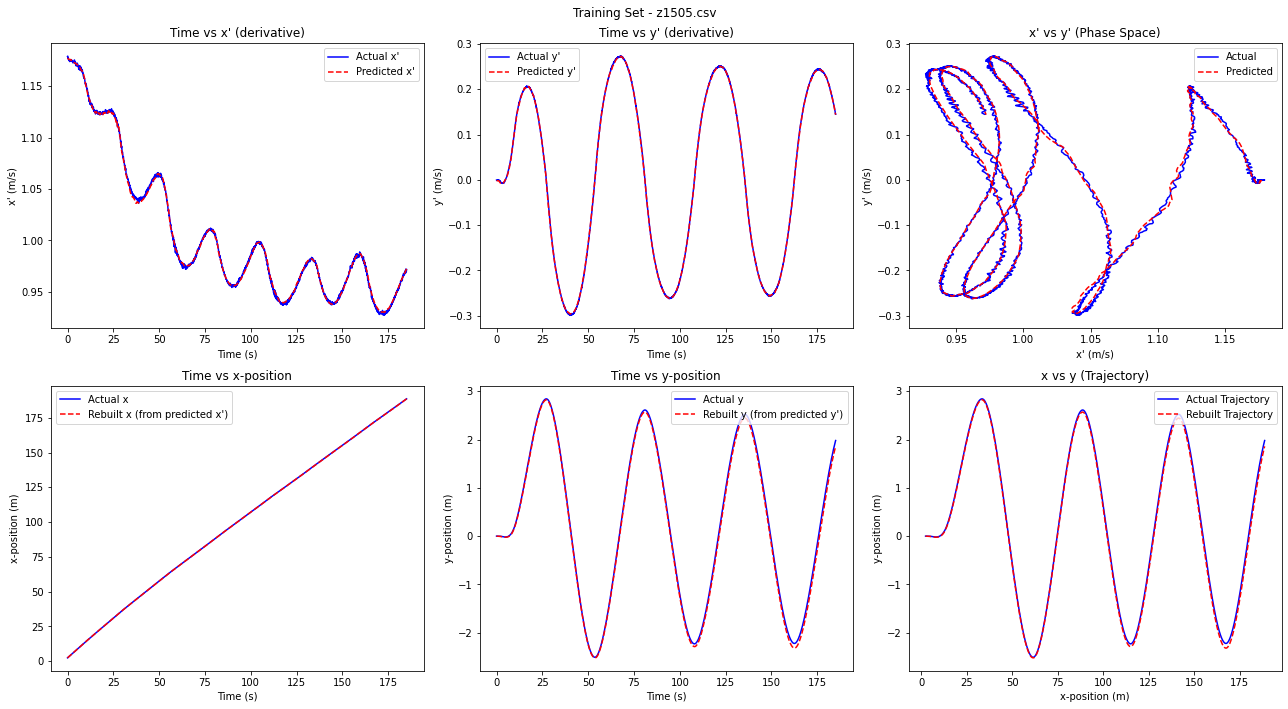

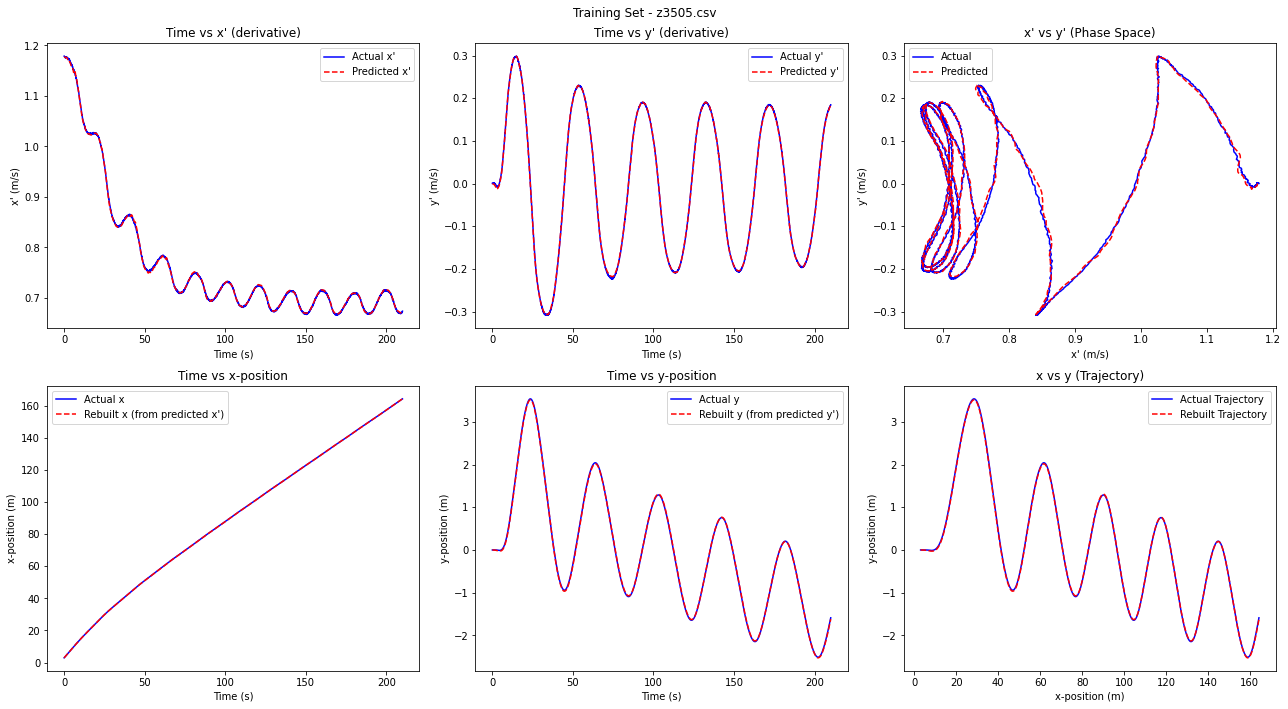

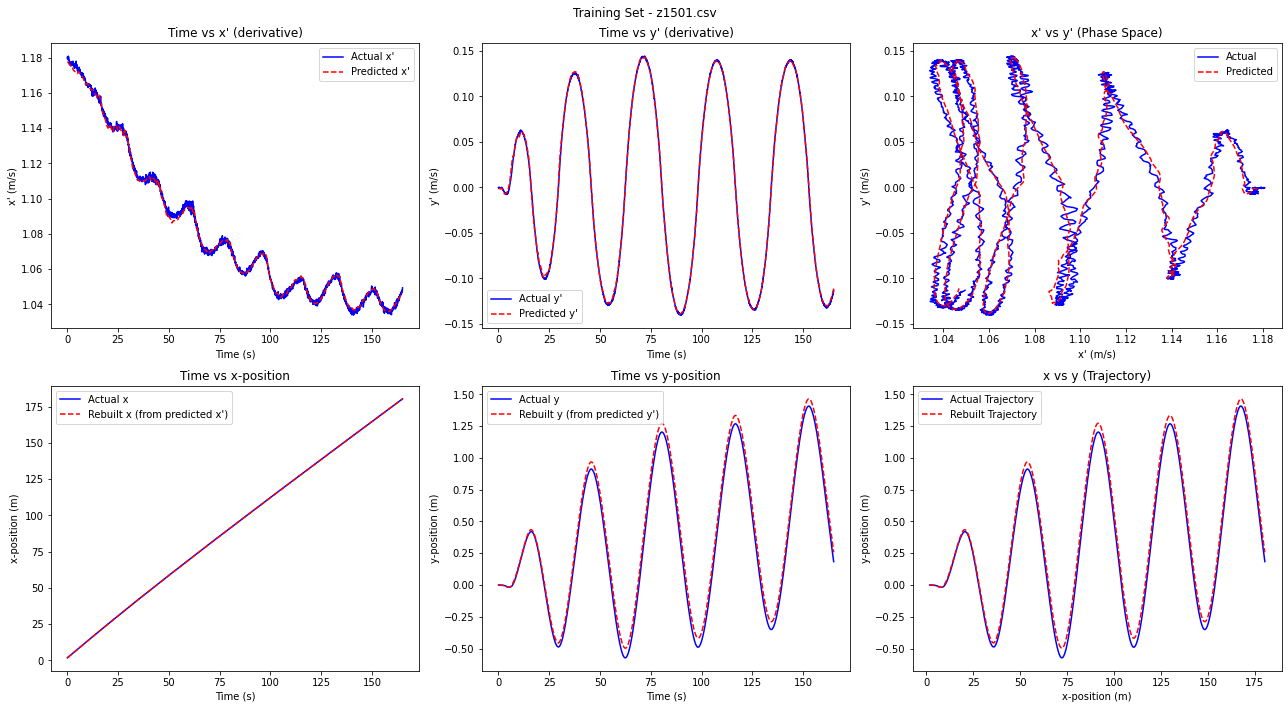

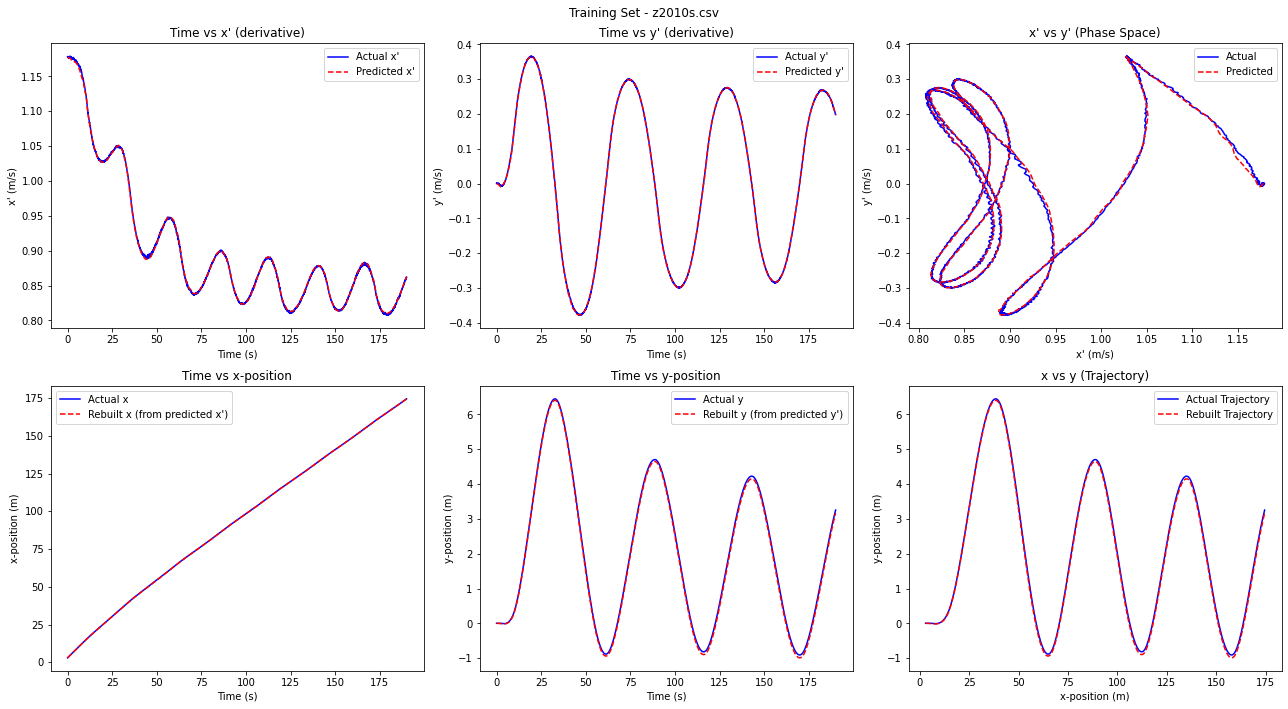

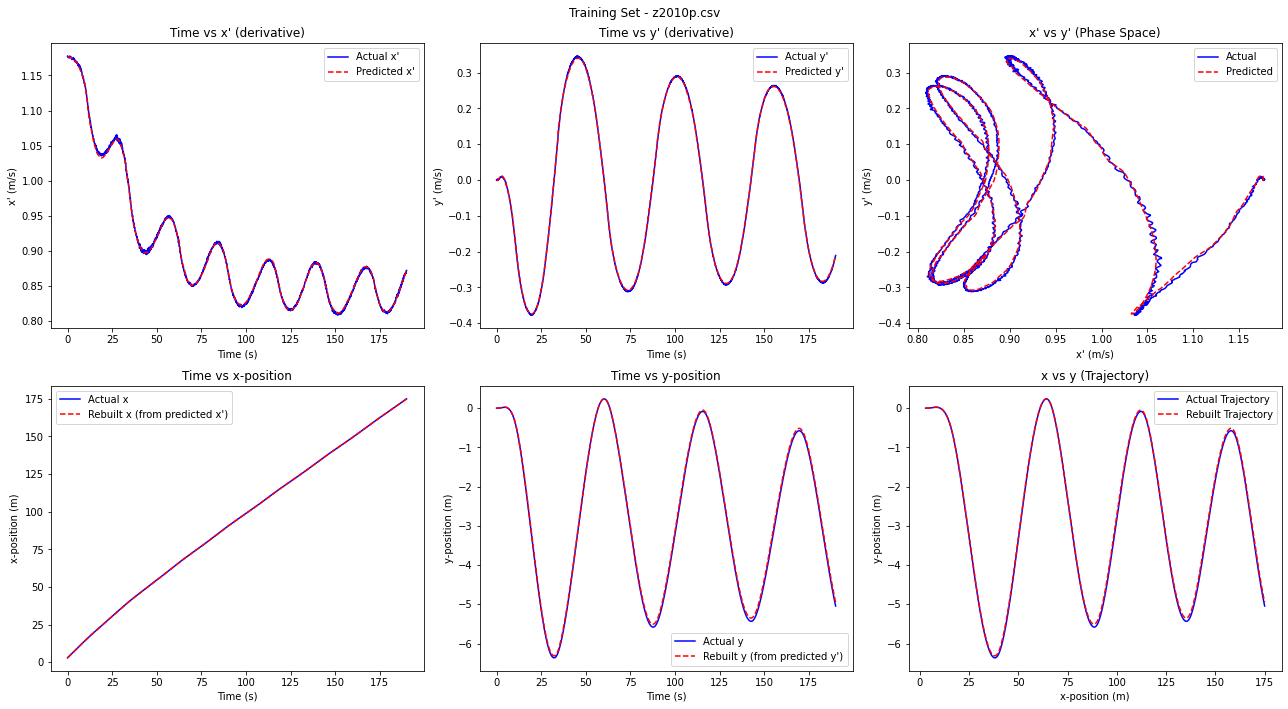

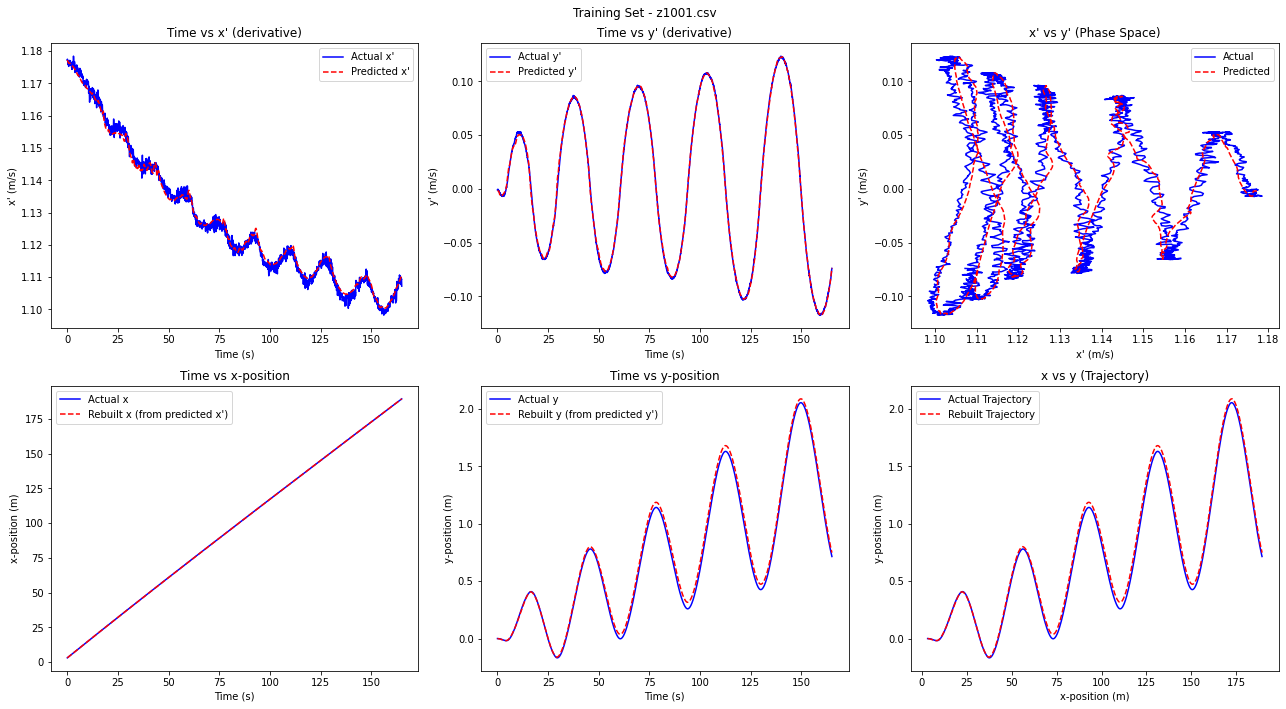

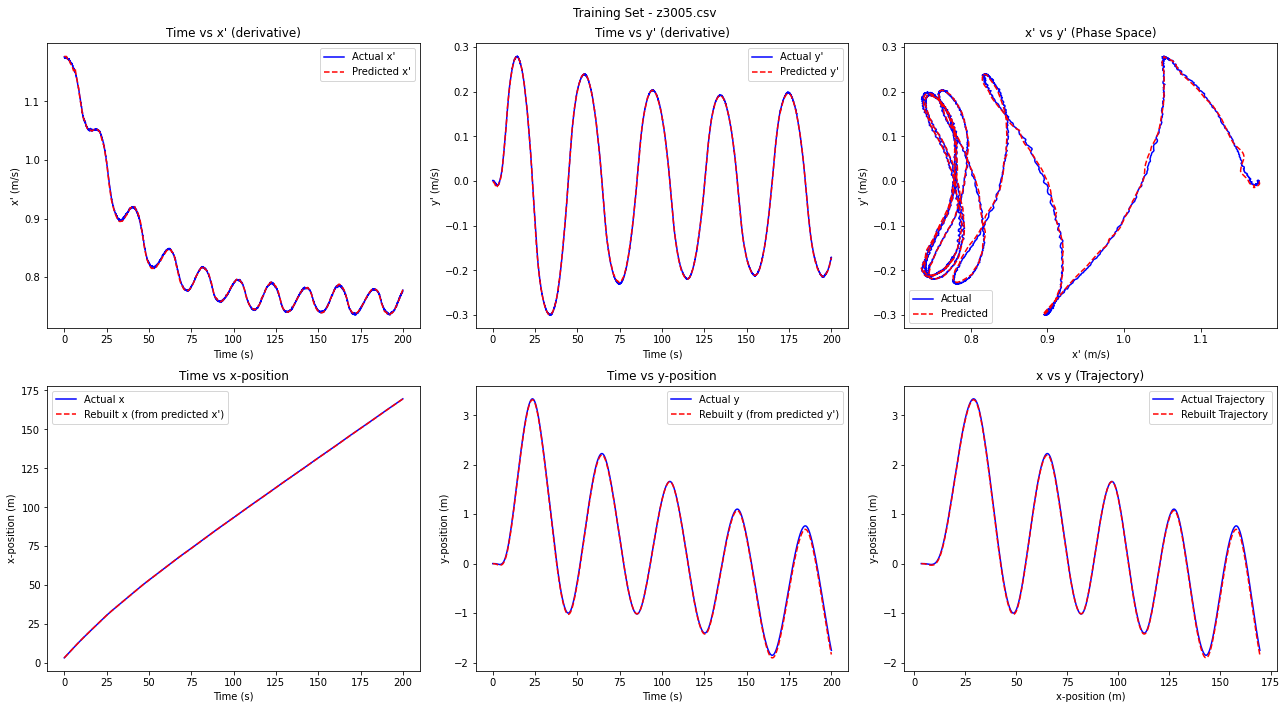

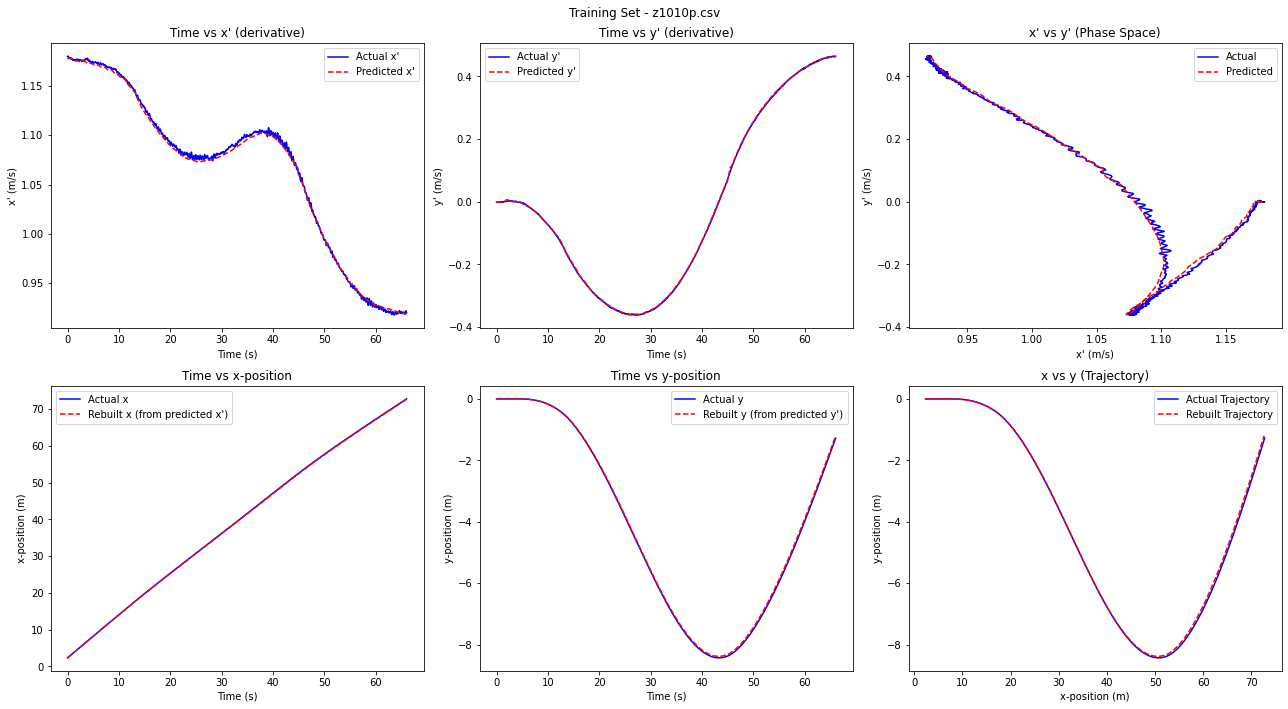

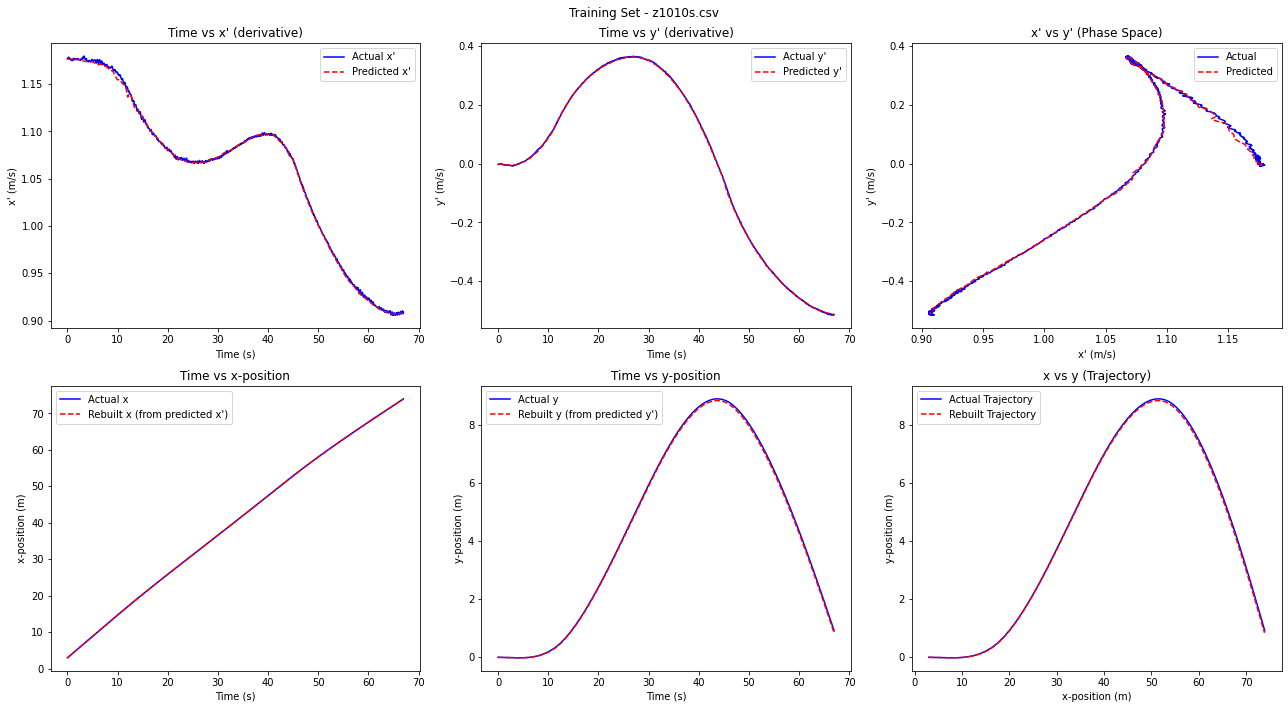

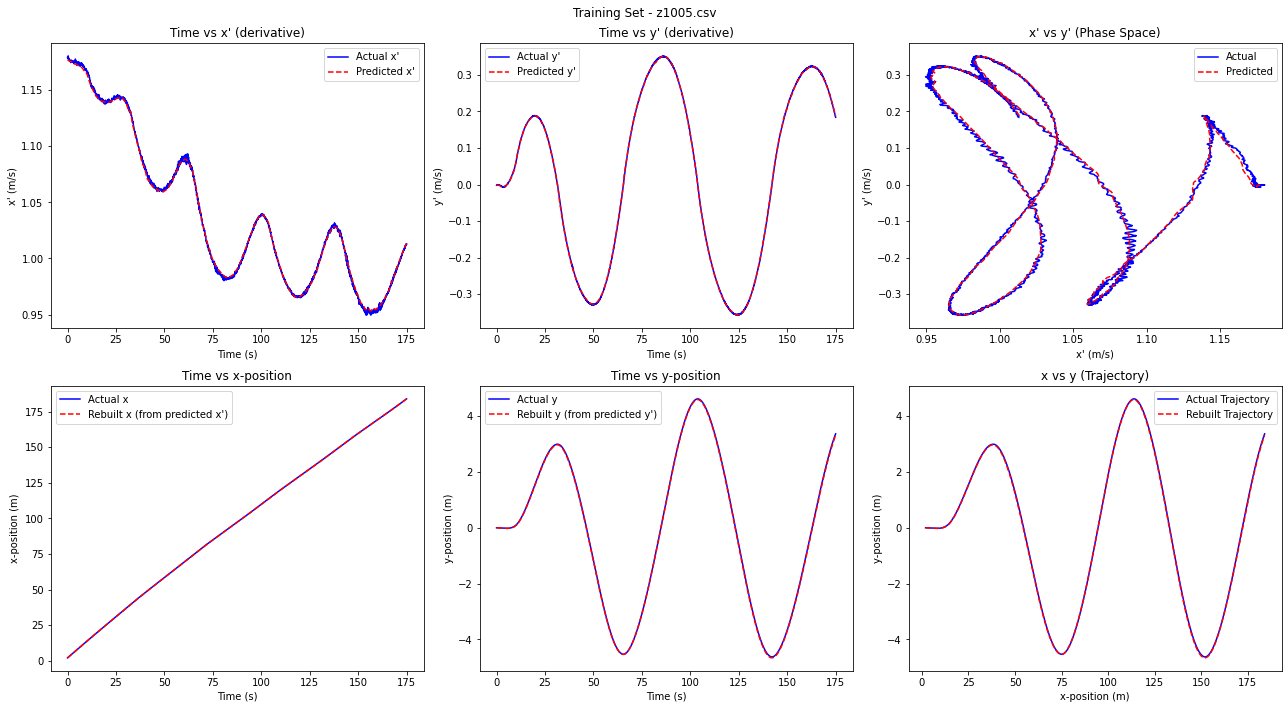

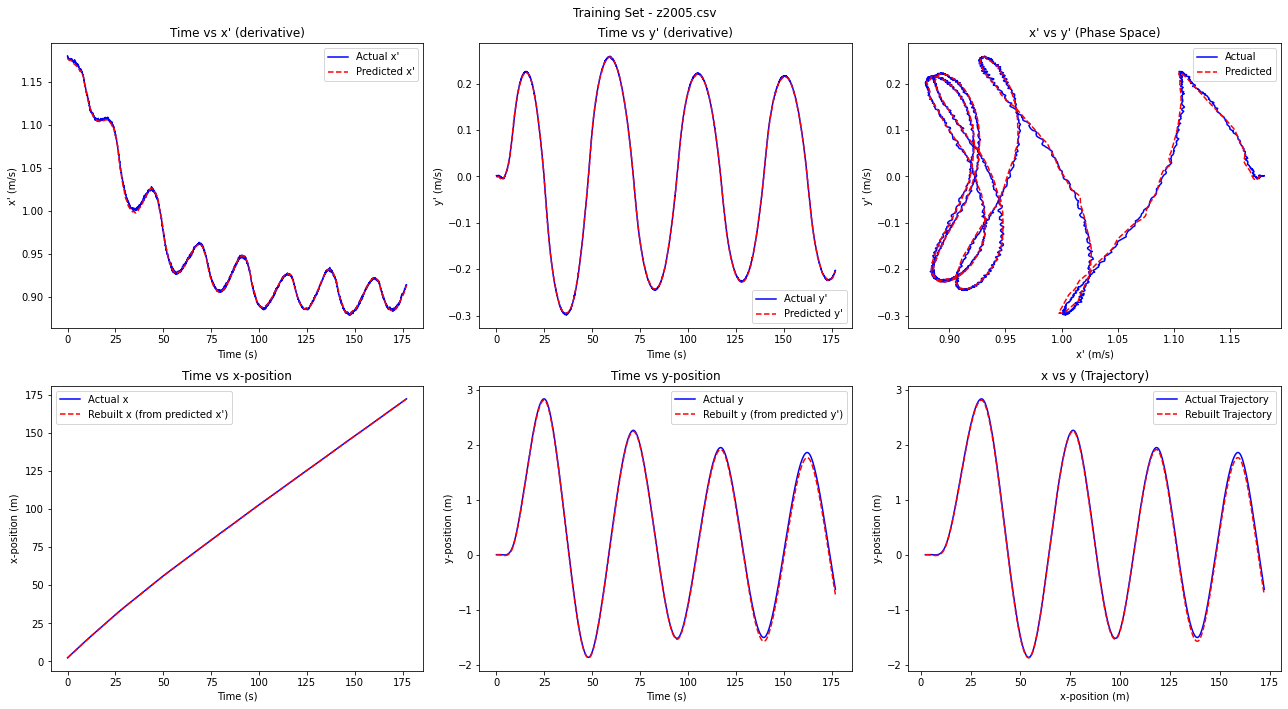

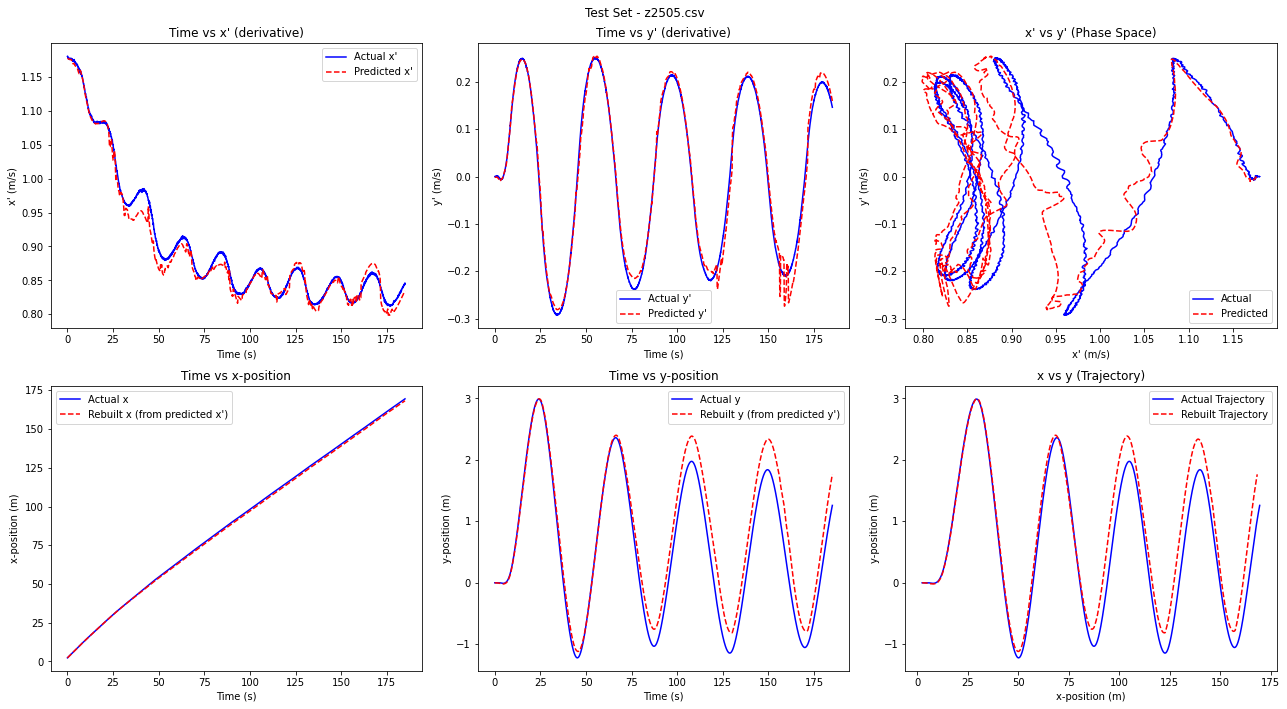

测试集 x' RMSE: 0.0129 m/s
测试集 y' RMSE: 0.0175 m/s
测试集 x-position RMSE (通过积分重建): 0.9096 m
测试集 y-position RMSE (通过积分重建): 0.3240 m


In [9]:
# 获取时间数据和准备数据结构来存储每个文件的原始位置和导数
time_train_list = []
x_position_list = []
y_position_list = []
x_derivative_list = []
y_derivative_list = []
x_derivative_pred_list = []
y_derivative_pred_list = []
file_indices = []

current_idx = 0
for file in file_list:
    data = pd.read_csv(os.path.join(folder_path, file))
    time_data = data['time'].values
    x_pos = data['x'].values
    y_pos = data['y'].values
    
    file_len = len(data)
    time_train_list.append(time_data)
    x_position_list.append(x_pos)
    y_position_list.append(y_pos)
    
    # 提取该文件对应的预测导数
    start_idx = current_idx
    end_idx = start_idx + file_len
    file_indices.append((start_idx, end_idx))
    
    x_deriv = targets_train_orig[start_idx:end_idx, 0]
    y_deriv = targets_train_orig[start_idx:end_idx, 1]
    x_deriv_pred = y_train_pred[start_idx:end_idx, 0]
    y_deriv_pred = y_train_pred[start_idx:end_idx, 1]
    
    x_derivative_list.append(x_deriv)
    y_derivative_list.append(y_deriv)
    x_derivative_pred_list.append(x_deriv_pred)
    y_derivative_pred_list.append(y_deriv_pred)
    
    current_idx += file_len

# 分别绘制每个文件的训练集时间-导数曲线和时间-位置积分曲线
for i, file in enumerate(file_list):
    time_train = time_train_list[i]
    x_position = x_position_list[i]
    y_position = y_position_list[i]
    x_derivative = x_derivative_list[i]
    y_derivative = y_derivative_list[i]
    x_derivative_pred = x_derivative_pred_list[i]
    y_derivative_pred = y_derivative_pred_list[i]
    
    # 从预测的导数通过欧拉积分重建位置
    x_rebuilt = np.zeros_like(x_position)
    y_rebuilt = np.zeros_like(y_position)
    
    # 第一个点使用真实值
    x_rebuilt[0] = x_position[0]
    y_rebuilt[0] = y_position[0]
    
    # 欧拉积分
    for j in range(1, len(time_train)):
        dt = time_train[j] - time_train[j-1]
        x_rebuilt[j] = x_rebuilt[j-1] + x_derivative_pred[j-1] * dt
        y_rebuilt[j] = y_rebuilt[j-1] + y_derivative_pred[j-1] * dt
    
    # 创建两行图：第一行显示导数，第二行显示位置
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f'Training Set - {file}')
    
    # 第一行：导数
    axs[0, 0].plot(time_train, x_derivative, 'b-', label='Actual x\'')
    axs[0, 0].plot(time_train, x_derivative_pred, 'r--', label='Predicted x\'')
    axs[0, 0].set_title('Time vs x\' (derivative)')
    axs[0, 0].set_xlabel('Time (s)')
    axs[0, 0].set_ylabel('x\' (m/s)')
    axs[0, 0].legend()
    
    axs[0, 1].plot(time_train, y_derivative, 'b-', label='Actual y\'')
    axs[0, 1].plot(time_train, y_derivative_pred, 'r--', label='Predicted y\'')
    axs[0, 1].set_title('Time vs y\' (derivative)')
    axs[0, 1].set_xlabel('Time (s)')
    axs[0, 1].set_ylabel('y\' (m/s)')
    axs[0, 1].legend()
    
    # 第一行第三列：相位图 (x' vs y')
    axs[0, 2].plot(x_derivative, y_derivative, 'b-', label='Actual')
    axs[0, 2].plot(x_derivative_pred, y_derivative_pred, 'r--', label='Predicted')
    axs[0, 2].set_title('x\' vs y\' (Phase Space)')
    axs[0, 2].set_xlabel('x\' (m/s)')
    axs[0, 2].set_ylabel('y\' (m/s)')
    axs[0, 2].legend()
    
    # 第二行：位置和积分后的位置
    axs[1, 0].plot(time_train, x_position, 'b-', label='Actual x')
    axs[1, 0].plot(time_train, x_rebuilt, 'r--', label='Rebuilt x (from predicted x\')')
    axs[1, 0].set_title('Time vs x-position')
    axs[1, 0].set_xlabel('Time (s)')
    axs[1, 0].set_ylabel('x-position (m)')
    axs[1, 0].legend()
    
    axs[1, 1].plot(time_train, y_position, 'b-', label='Actual y')
    axs[1, 1].plot(time_train, y_rebuilt, 'r--', label='Rebuilt y (from predicted y\')')
    axs[1, 1].set_title('Time vs y-position')
    axs[1, 1].set_xlabel('Time (s)')
    axs[1, 1].set_ylabel('y-position (m)')
    axs[1, 1].legend()
    
    # 第二行第三列：轨迹图 (x vs y)
    axs[1, 2].plot(x_position, y_position, 'b-', label='Actual Trajectory')
    axs[1, 2].plot(x_rebuilt, y_rebuilt, 'r--', label='Rebuilt Trajectory')
    axs[1, 2].set_title('x vs y (Trajectory)')
    axs[1, 2].set_xlabel('x-position (m)')
    axs[1, 2].set_ylabel('y-position (m)')
    axs[1, 2].legend()
    
    plt.tight_layout()
    plt.show()

# 测试集处理：从预测的导数重建位置
# 从预测的导数通过欧拉积分重建位置
x_rebuilt_test = np.zeros_like(x_position_test)
y_rebuilt_test = np.zeros_like(y_position_test)

# 使用真实的初始位置
x_rebuilt_test[0] = x_position_test[0]
y_rebuilt_test[0] = y_position_test[0]

# 欧拉积分
for j in range(1, len(time_test)):
    dt = time_test[j] - time_test[j-1]
    x_rebuilt_test[j] = x_rebuilt_test[j-1] + y_test_pred[j-1, 0] * dt
    y_rebuilt_test[j] = y_rebuilt_test[j-1] + y_test_pred[j-1, 1] * dt

# 测试集图形：两行
fig_test, axs_test = plt.subplots(2, 3, figsize=(18, 10))
fig_test.suptitle('Test Set - z2505.csv')

# 第一行：导数
axs_test[0, 0].plot(time_test, targets_test_orig[:, 0], 'b-', label='Actual x\'')
axs_test[0, 0].plot(time_test, y_test_pred[:, 0], 'r--', label='Predicted x\'')
axs_test[0, 0].set_title('Time vs x\' (derivative)')
axs_test[0, 0].set_xlabel('Time (s)')
axs_test[0, 0].set_ylabel('x\' (m/s)')
axs_test[0, 0].legend()

axs_test[0, 1].plot(time_test, targets_test_orig[:, 1], 'b-', label='Actual y\'')
axs_test[0, 1].plot(time_test, y_test_pred[:, 1], 'r--', label='Predicted y\'')
axs_test[0, 1].set_title('Time vs y\' (derivative)')
axs_test[0, 1].set_xlabel('Time (s)')
axs_test[0, 1].set_ylabel('y\' (m/s)')
axs_test[0, 1].legend()

# 第一行第三列：相位图 (x' vs y')
axs_test[0, 2].plot(targets_test_orig[:, 0], targets_test_orig[:, 1], 'b-', label='Actual')
axs_test[0, 2].plot(y_test_pred[:, 0], y_test_pred[:, 1], 'r--', label='Predicted')
axs_test[0, 2].set_title('x\' vs y\' (Phase Space)')
axs_test[0, 2].set_xlabel('x\' (m/s)')
axs_test[0, 2].set_ylabel('y\' (m/s)')
axs_test[0, 2].legend()

# 第二行：位置和积分后的位置
axs_test[1, 0].plot(time_test, x_position_test, 'b-', label='Actual x')
axs_test[1, 0].plot(time_test, x_rebuilt_test, 'r--', label='Rebuilt x (from predicted x\')')
axs_test[1, 0].set_title('Time vs x-position')
axs_test[1, 0].set_xlabel('Time (s)')
axs_test[1, 0].set_ylabel('x-position (m)')
axs_test[1, 0].legend()

axs_test[1, 1].plot(time_test, y_position_test, 'b-', label='Actual y')
axs_test[1, 1].plot(time_test, y_rebuilt_test, 'r--', label='Rebuilt y (from predicted y\')')
axs_test[1, 1].set_title('Time vs y-position')
axs_test[1, 1].set_xlabel('Time (s)')
axs_test[1, 1].set_ylabel('y-position (m)')
axs_test[1, 1].legend()

# 第二行第三列：轨迹图 (x vs y)
axs_test[1, 2].plot(x_position_test, y_position_test, 'b-', label='Actual Trajectory')
axs_test[1, 2].plot(x_rebuilt_test, y_rebuilt_test, 'r--', label='Rebuilt Trajectory')
axs_test[1, 2].set_title('x vs y (Trajectory)')
axs_test[1, 2].set_xlabel('x-position (m)')
axs_test[1, 2].set_ylabel('y-position (m)')
axs_test[1, 2].legend()

plt.tight_layout()
plt.show()

# 计算测试集的均方根误差 (RMSE)
rmse_x_derivative = np.sqrt(np.mean((targets_test_orig[:, 0] - y_test_pred[:, 0])**2))
rmse_y_derivative = np.sqrt(np.mean((targets_test_orig[:, 1] - y_test_pred[:, 1])**2))
rmse_x_position = np.sqrt(np.mean((x_position_test - x_rebuilt_test)**2))
rmse_y_position = np.sqrt(np.mean((y_position_test - y_rebuilt_test)**2))

print(f"测试集 x' RMSE: {rmse_x_derivative:.4f} m/s")
print(f"测试集 y' RMSE: {rmse_y_derivative:.4f} m/s")
print(f"测试集 x-position RMSE (通过积分重建): {rmse_x_position:.4f} m")
print(f"测试集 y-position RMSE (通过积分重建): {rmse_y_position:.4f} m")